<h1><center><font color = '#ABC510'>🥑🥑🥑 Precios de las paltas 🥑🥑🥑</center></font></h1>

<center><img src="https://drive.google.com/uc?id=1rMCZTjirXPSxaQbjkAlo300E6hTHd-LF"></center>

**Grupo: A**

Integrantes:

🥑 Christian Bocaz

🥑 Daniel González

🥑 Joao Guzmán

🥑 Katalina Lizana

🥑 Jenniffer Paredes

🥑 Milton Saavedra

###**Base de datos**

Fuente de la base escogida: https://www.kaggle.com/neuromusic/avocado-prices

Fuente de los datos: https://hassavocadoboard.com/report/total-us/

El dataframe usado tiene 18.249 filas y 14 columnas y van desde el 04-01-2015 hasta el 25-03-2018 en Estados Unidos.

### **Contexto**

Es sabido que los Millenials aman la palta. También es sabido que es un hecho sabido que todos los Millenials viven en los sótanos de sus padres.

Claramente, ellos no están comprando su propio hogar porque están comprando muchas tostadas con palta!

Quizás hay esperanza... si un Millenial pudiera encontrar una ciudad con paltas baratas, podrían vivir el Sueño Millenial Americano.

### **Contenido**

Contenido de la base de datos:

🥑 **Date:** Fecha de la observación

🥑 **AveragePrice:** Precio promedio de las paltas vendidas en una determinada fecha, región y tipo.

🥑 **type:** Tipo de palta, puede ser convencional u orgánica.

🥑 **year:** Año de la venta.

🥑 **Region:** Ciudad o región de la observación

🥑 **Total Volume:** Total de paltas vendidas.

🥑 **4046:** Número total de paltas con PLU 4046 (calibre) vendidas.

🥑 **4225:** Número total de paltas con PLU 4225 (calibre) vendidas.

🥑 **4770:** Número total de paltas con PLU 4770 (calibre) vendidas.

🥑 **Total bags:** Número total de paltas que no son ni PLU 4046, 4225 o 4770 vendidas. El número de Small, Large y XLarge bags suman este número.

🥑 **Small bags:** Número total de paltas tamaño pequeño vendidas.

🥑 **Large bags:** Número total de paltas de tamaño grande vendidas.

🥑 **XLarge bags:** Número total de paltas de tamaño muy grande vendidas.


In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Para descargar el archivo original con todos los datos, al ambiente colab
# El ID del archivo compartido es: 1xwAyDkysr0ognTBCJJQ971aDXgZCs6xM

!gdown --id 1xwAyDkysr0ognTBCJJQ971aDXgZCs6xM

# Lectura de la base de datos original
df = pd.read_csv('/content/avocado.csv', sep=',', header=0)
df.info()


Downloading...
From: https://drive.google.com/uc?id=1xwAyDkysr0ognTBCJJQ971aDXgZCs6xM
To: /content/avocado.csv
100% 1.99M/1.99M [00:00<00:00, 132MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage

**<h2><font color = '#ABC510'>🥑BASE DE DATOS Y SU LIMPIEZA</font></h2>**

Revisando la base de datos notamos que habían regiones que concentraban los datos y de acuerdo a la organización que entrega estos datos, "TotalUS" agrupa las regiones de: **California, Great Lakes, Midsouth, Northeast, Plains Soughteast, South Central** y **West**. 

<center><img src="https://drive.google.com/uc?id=1cTDuQKfjN9_pHnDL946Ofh2j_On-0u7c"></center>

Fuente: https://hassavocadoboard.com/report/total-us/


Y así mismo, estas regiones como la de California, agrupan a otros estados como vemos en esta imagen:

<center><img src="https://drive.google.com/uc?id=1GTiCYGABDITVeAHJu6C_FlTyCVqF9Lp8"></center>

Fuente: https://hassavocadoboard.com/category-data/

Es por esto que tanto TotalUS como las otras regiones nombradas serán sacadas de la base para tener un análisis más depurado.
Además con el método info() notamos que no hay nulos, por lo que no hay que hacer tratamiento de nulos.

Finalmente notamos que hay una columna con índices que no aporta información, por lo que también es eliminada.


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

# Se transforma la variable Date de obj a datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

df = df.drop(df[df['region'] == 'TotalUS'].index)
df = df.drop(df[df['region'] == 'California'].index)
df = df.drop(df[df['region'] == 'West'].index)
df = df.drop(df[df['region'] == 'Plains'].index)
df = df.drop(df[df['region'] == 'SouthCentral'].index)
df = df.drop(df[df['region'] == 'GreatLakes'].index)
df = df.drop(df[df['region'] == 'Northeast'].index)
df = df.drop(df[df['region'] == 'Midsouth'].index)
df = df.drop(df[df['region'] == 'Southeast'].index)

# Se crea una variable adicional 'venta', la cual es el precio promedio por
# el volumen vendido, para obtener la venta en unidades monetarias.
df['venta'] = df['AveragePrice']*df['Total Volume']

# También creamos las variables mes y trimestre
df['mes'] = df['Date'].dt.month
df['Qtr'] = pd.to_datetime(df.Date).dt.quarter

# Se renombran las columnas del calibre de paltas por uno más descriptivo.
df.rename(columns={'4046': 'Avocado Small', '4225': 'Avocado Large',
                   '4770': 'Avocado Extra-Large'}, inplace=True)

df.head()


,Date,AveragePrice,Total Volume,Avocado Small,Avocado Large,Avocado Extra-Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,venta,mes,Qtr
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046,12,4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230,12,4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046,12,4
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220,12,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880,11,4


**<h2><font color= '#ABC510'>🥑GRÁFICAS UNIVARIADAS CON LIBRERÍAS MATPLOTLIB Y SEABORN</h2>**

### Análisis exploratorio variables cuantitativas

In [ ]:
# Para describir las variables separaremos el dataframe en dos, uno que
# contenga las variables cuantitativas y el otro aquellas variables
# categoricas.

cuantitativa = [df["AveragePrice"], df["Total Volume"], df["Avocado Small"],
                df["Avocado Large"], df["Avocado Extra-Large"],
                df["Small Bags"], df["Large Bags"], df["XLarge Bags"],
                df["Total Bags"]]
headers = ['AveragePrice', 'Total Volume', 'Avocado Small', 'Avocado Large',
           'Avocado Extra-Large', 'Small Bags', 'Large Bags', 'XLarge Bags',
           'Total Bags']

df1 = pd.concat(cuantitativa, axis=1, keys=headers)

# Análisis exploratorio de las variables cuantitativas
pd.set_option('float_format', '{:,.1f}'.format)
df1.describe()


,AveragePrice,Total Volume,Avocado Small,Avocado Large,Avocado Extra-Large,Small Bags,Large Bags,XLarge Bags,Total Bags
count,"15,207.0","15,207.0","15,207.0","15,207.0","15,207.0","15,207.0","15,207.0","15,207.0","15,207.0"
mean,1.4,"249,485.3","81,359.8","89,186.1","6,868.7","55,089.7","16,074.6",906.1,"72,070.4"
std,0.4,"434,375.3","198,518.8","166,240.5","19,871.0","124,677.4","42,267.9","3,874.8","143,733.5"
min,0.4,84.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.1,"8,534.2",542.1,"2,100.8",0.0,"1,817.0",45.4,0.0,"3,552.7"
50%,1.4,"64,602.5","4,543.6","17,520.6",101.7,"16,479.8","1,569.3",0.0,"23,996.6"
75%,1.7,"315,396.7","76,705.9","95,475.4","3,400.2","63,725.9","11,094.7",37.7,"82,049.9"
max,3.2,"5,470,227.1","2,914,047.4","2,283,465.2","279,630.3","2,656,630.4","706,052.8","61,316.9","2,701,609.8"


A continuación se muestra la distribución de los datos en histogramas por cada variable. Se puede notar que en la mayoría de histogramas los datos se concentran hacia la izquierda del eje X, esto también se puede observar mejor con boxplot.

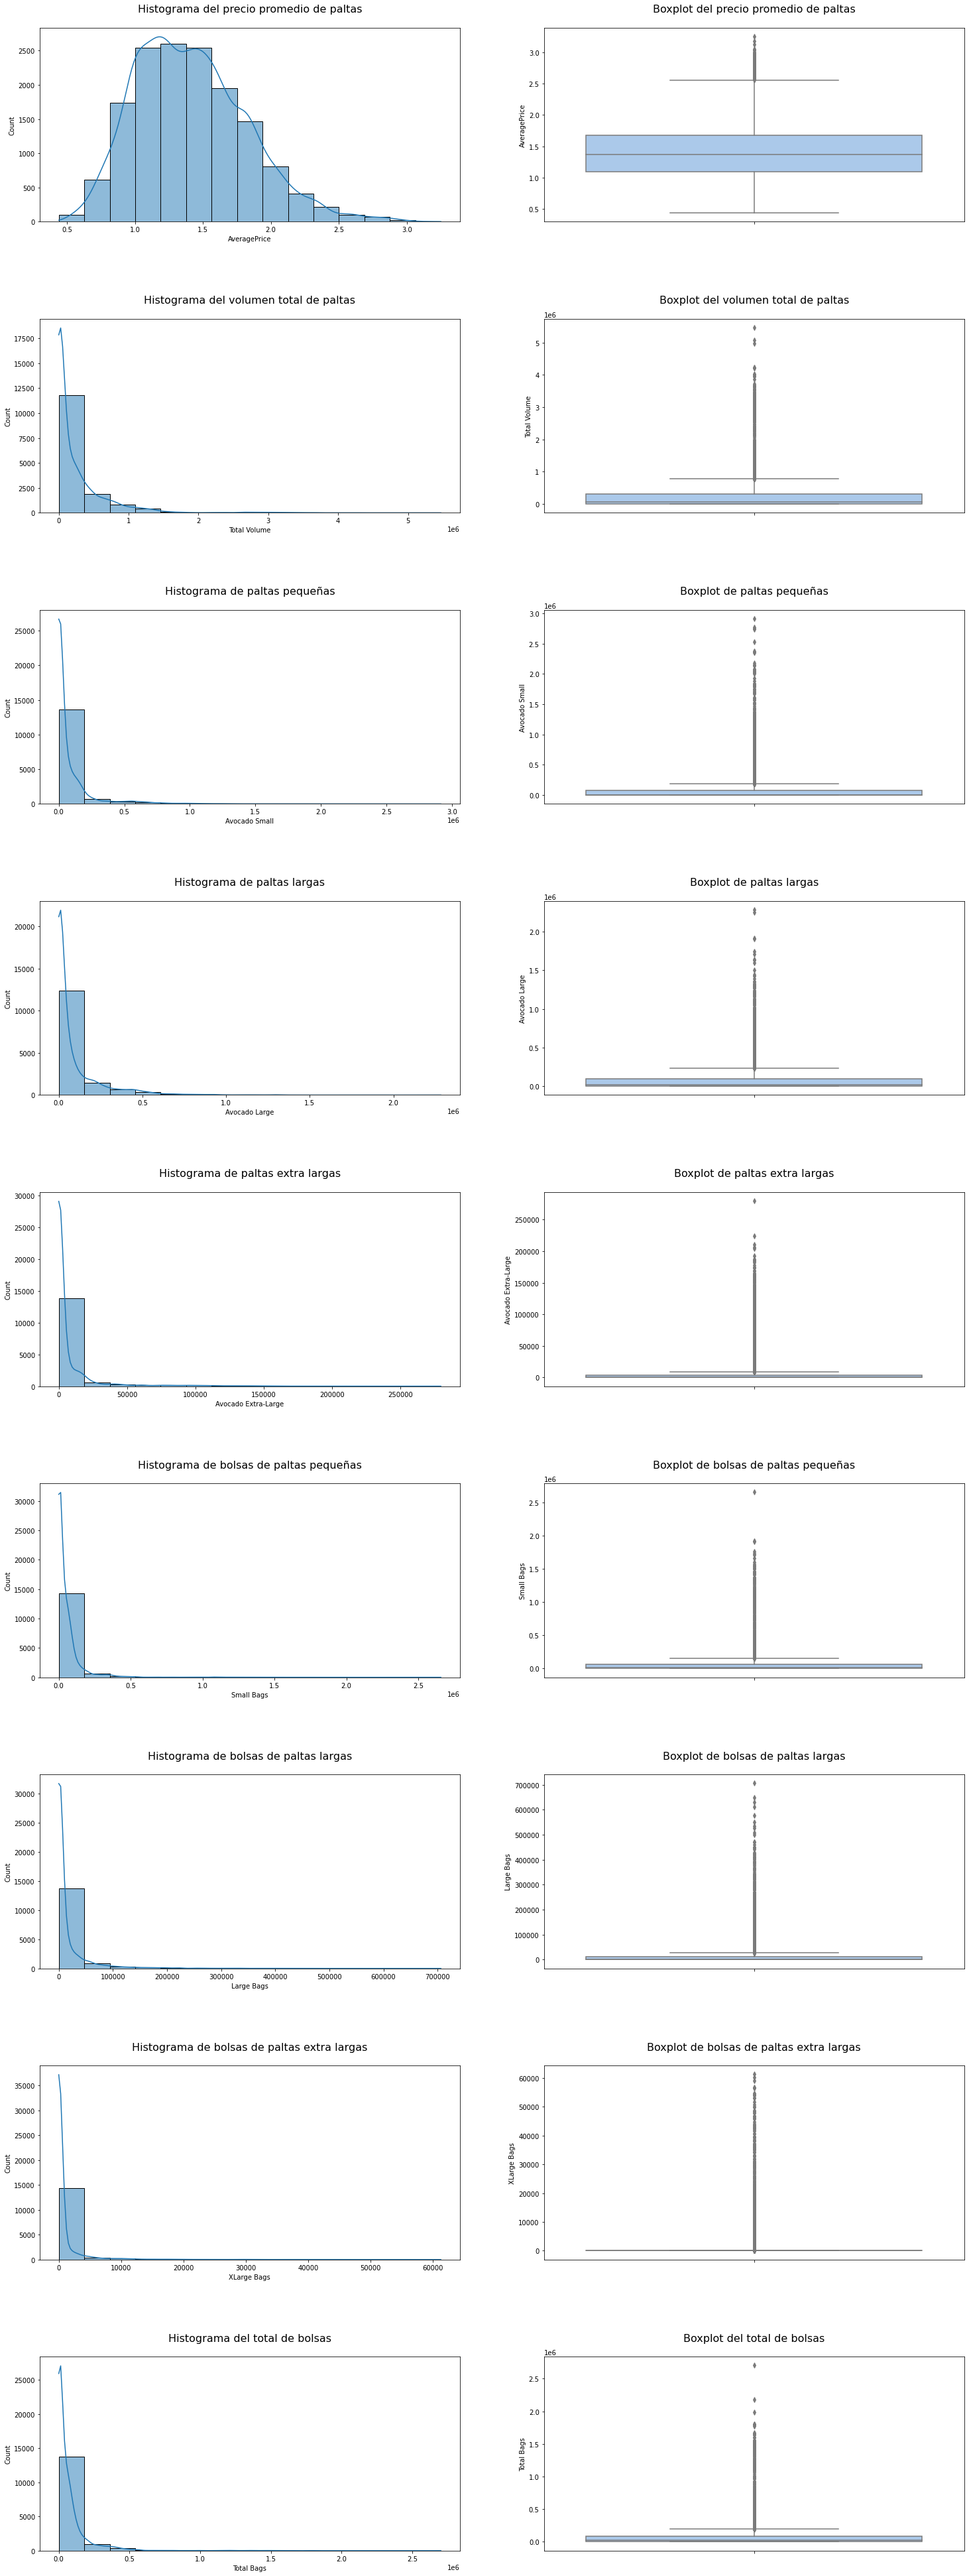

In [ ]:
# Gráficas de distribución de cada variable del conjunto de datos
# Definiremos 9 filas y 2 columnas

fig, ax = plt.subplots(9, 2, figsize=(25, 70))
sns.histplot(x='AveragePrice', data=df1, bins=15, kde=True,
             ax=ax[0][0]).set_title(
                 "Histograma del precio promedio de paltas\n", fontsize=16)
sns.boxplot(y='AveragePrice', data=df1, ax=ax[0][1],
            palette="pastel").set_title(
                "Boxplot del precio promedio de paltas\n", fontsize=16)
sns.histplot(x='Total Volume', data=df1, bins=15, kde=True,
             ax=ax[1][0]).set_title(
                 "Histograma del volumen total de paltas\n", fontsize=16)
sns.boxplot(y='Total Volume', data=df1, ax=ax[1][1],
            palette="pastel").set_title(
                "Boxplot del volumen total de paltas\n", fontsize=16)
sns.histplot(x='Avocado Small', data=df1, bins=15, kde=True,
             ax=ax[2][0]).set_title(
                 "Histograma de paltas pequeñas\n", fontsize=16)
sns.boxplot(y='Avocado Small', data=df1, ax=ax[2][1],
            palette="pastel").set_title(
                "Boxplot de paltas pequeñas\n", fontsize=16)
sns.histplot(x='Avocado Large', data=df1, bins=15, kde=True,
             ax=ax[3][0]).set_title(
                 "Histograma de paltas largas\n", fontsize=16)
sns.boxplot(y='Avocado Large', data=df1, ax=ax[3][1],
            palette="pastel").set_title(
                "Boxplot de paltas largas\n", fontsize=16)
sns.histplot(x='Avocado Extra-Large', data=df1, bins=15, kde=True,
             ax=ax[4][0]).set_title(
                 "Histograma de paltas extra largas\n", fontsize=16)
sns.boxplot(y='Avocado Extra-Large', data=df1, ax=ax[4][1],
            palette="pastel").set_title(
                "Boxplot de paltas extra largas\n", fontsize=16)
sns.histplot(x='Small Bags', data=df1, bins=15, kde=True,
             ax=ax[5][0]).set_title(
                 "Histograma de bolsas de paltas pequeñas\n", fontsize=16)
sns.boxplot(y='Small Bags', data=df1, ax=ax[5][1],
            palette="pastel").set_title(
                "Boxplot de bolsas de paltas pequeñas\n", fontsize=16)
sns.histplot(x='Large Bags', data=df1, bins=15, kde=True,
             ax=ax[6][0]).set_title(
                 "Histograma de bolsas de paltas largas\n", fontsize=16)
sns.boxplot(y='Large Bags', data=df1, ax=ax[6][1],
            palette="pastel").set_title(
                "Boxplot de bolsas de paltas largas\n", fontsize=16)
sns.histplot(x='XLarge Bags', data=df1, bins=15, kde=True,
             ax=ax[7][0]).set_title(
                 "Histograma de bolsas de paltas extra largas\n", fontsize=16)
sns.boxplot(y='XLarge Bags', data=df1, ax=ax[7][1],
            palette="pastel").set_title(
                "Boxplot de bolsas de paltas extra largas\n", fontsize=16)
sns.histplot(x='Total Bags', data=df1, bins=15, kde=True,
             ax=ax[8][0]).set_title(
                 "Histograma del total de bolsas\n", fontsize=16)
sns.boxplot(y='Total Bags', data=df1, ax=ax[8][1],
            palette="pastel").set_title(
                "Boxplot del total de bolsas\n", fontsize=16)

plt.subplots_adjust(hspace=0.5)

plt.show()


Del primer análisis exploratorio, se observa una alta concentración de datos, lo que genear una asimetría en la distribución de los datos hacia izquierda (positiva). Existen diferentes métodos para abordar la normalización de esta distribución en los datos, que veremos más adelante.

<center><img src=https://www.cursosgis.com/wp-content/uploads/cajas-y-bigotes6-700x154.png></center>



### Análisis exploratorio variables categóricas

Tabla de frecuencia de tipos de paltas que se han vendido.

In [ ]:
categoricos = [df["type"], df["region"]]
headers2 = ['type', 'region']
df2 = pd.concat(categoricos, axis=1, keys=headers2)
pd.value_counts(df2['type'])


conventional    7605
organic         7602
Name: type, dtype: int64

Tabla de contingencia: Cantidad de paltas vendidas según tipo de palta y año.


In [ ]:
pd.crosstab(index=df2['type'], columns=df['year'],
            rownames=["Tipos de paltas"], colnames=["Año vendido"],
            margins=True)


Año vendido,2015,2016,2017,2018,All
Tipos de paltas,,,,,
conventional,2340,2340,2385,540,7605
organic,2339,2340,2383,540,7602
All,4679,4680,4768,1080,15207


De esta revisión, se observa una cantidad de registros equitativa, sin embargo, este análisis no es suficiente, pues es necesario considerar el impacto de los volúmenes asociados.

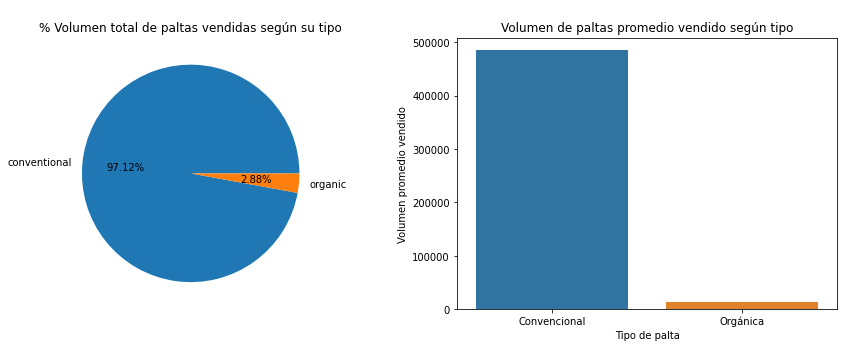

type
conventional   3,684,777,738.9
organic          109,144,490.6
Name: Total Volume, dtype: float64


In [ ]:
# frecuencia de tipos de paltas que se han vendido agrupadas por el volumen
# total de venta.
df3 = df.groupby(['type'])['Total Volume'].sum()

sumas2 = df.groupby("type")["Total Volume"].mean()
df_sumas2 = pd.DataFrame(
    [["Convencional", sumas2[0]], ["Orgánica", sumas2[1]]],
    columns=["Tipo de palta", "Volumen promedio vendido"])

fig, ax = plt.subplots(1, 2, figsize=(15, 5), )

plot = df.groupby(
    ['type'])['Total Volume'].sum(
        ).plot(kind='pie', autopct='%.2f%%', ylabel="",
               title='\n% Volumen total de paltas vendidas según su tipo',
               ax=ax[0])

sns.barplot(x="Tipo de palta", y="Volumen promedio vendido", data=df_sumas2,
            ax=ax[1])
plt.title("Volumen de paltas promedio vendido según tipo")
plt.show()

print(df3)


In [ ]:
# Tabla de frecuencia de regiones en las cuales se han vendido paltas
pd.value_counts(df2['region'])


DallasFtWorth          338
Columbus               338
HarrisburgScranton     338
Philadelphia           338
Charlotte              338
LasVegas               338
Roanoke                338
MiamiFtLauderdale      338
BuffaloRochester       338
GrandRapids            338
Tampa                  338
SouthCarolina          338
CincinnatiDayton       338
Denver                 338
Portland               338
Detroit                338
Spokane                338
SanFrancisco           338
Jacksonville           338
Orlando                338
Pittsburgh             338
Boston                 338
Chicago                338
RaleighGreensboro      338
NewYork                338
RichmondNorfolk        338
Sacramento             338
LosAngeles             338
Boise                  338
Nashville              338
PhoenixTucson          338
Houston                338
BaltimoreWashington    338
SanDiego               338
Indianapolis           338
HartfordSpringfield    338
StLouis                338
N

In [ ]:
# Tabla de contingencia: Cantidad de paltas vendidas según región y tipo.
pd.crosstab(index=df2['region'], columns=df['type'], margins=True)


type,conventional,organic,All
region,,,
Albany,169,169,338
Atlanta,169,169,338
BaltimoreWashington,169,169,338
Boise,169,169,338
Boston,169,169,338
BuffaloRochester,169,169,338
Charlotte,169,169,338
Chicago,169,169,338
CincinnatiDayton,169,169,338


Al igual que en el caso anterior (donde revisamos la distribución de los datos por tipo de producción) los análisis por región realizados sólo nos indican que la data está distribuida equitativamente.

In [ ]:
# frecuencia de regiones en donde se han vendido paltas agrupadas por el
# volumen total de venta.
df4 = df.groupby(['region'])['Total Volume'].sum()
df4


region
Albany                 16,067,800.0
Atlanta                88,605,118.9
BaltimoreWashington   134,713,919.3
Boise                  14,413,187.7
Boston                 97,273,984.8
BuffaloRochester       22,962,470.4
Charlotte              35,555,544.4
Chicago               133,702,338.5
CincinnatiDayton       44,522,007.6
Columbus               29,993,361.4
DallasFtWorth         208,419,286.6
Denver                138,902,536.0
Detroit                63,422,419.4
GrandRapids            30,211,735.9
HarrisburgScranton     41,808,858.7
HartfordSpringfield    50,670,537.5
Houston               203,167,867.8
Indianapolis           30,263,391.4
Jacksonville           28,790,004.7
LasVegas               54,376,906.4
LosAngeles            507,896,547.6
Louisville             16,097,002.4
MiamiFtLauderdale      97,673,224.0
Nashville              35,612,089.2
NewOrleansMobile       45,695,136.6
NewYork               240,734,127.5
NorthernNewEngland     71,532,894.1
Orlando              

**<h2><font color='#ABC510'>🥑GRÁFICAS BIVARIADAS CON LIBRERÍAS MATPLOTLIB Y SEABORN</font></h2>**

In [ ]:
# Se crea un nuevo data frame, donde esté agrupado por fechas, así sacamos el
# precio promedio de esa fecha.
# Se crea una lista de fechas únicas, para poder utilizar esa columna
# más adelante.

fechas_unicas = df.groupby('Date')['Date'].nunique().index.tolist()
paltas = df.groupby(['Date'])['venta', 'Total Volume'].sum()
paltas['Precio promedio'] = paltas['venta']/paltas['Total Volume']
paltas['Fecha'] = fechas_unicas
paltas['new_index'] = range(len(fechas_unicas))
paltas = paltas.set_index('new_index')
paltas.head()


,venta,Total Volume,Precio promedio,Fecha
new_index,,,,
0,"19,813,889.8","20,799,961.4",1.0,2015-01-04
1,"19,507,073.9","19,089,664.0",1.0,2015-01-11
2,"19,935,413.3","18,875,626.4",1.1,2015-01-18
3,"19,541,812.1","18,412,921.7",1.1,2015-01-25
4,"26,149,867.6","28,660,518.3",0.9,2015-02-01


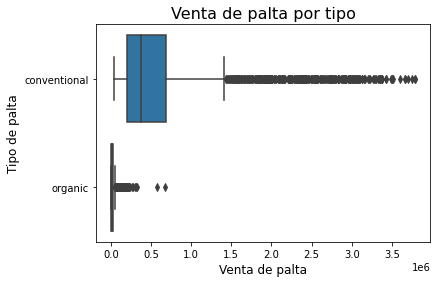

In [ ]:
sns.boxplot(x=df["venta"], y=df["type"])
plt.title("Venta de palta por tipo", size=16)
plt.xlabel('Venta de palta', fontsize=12)
plt.ylabel('Tipo de palta', fontsize=12)
plt.show()


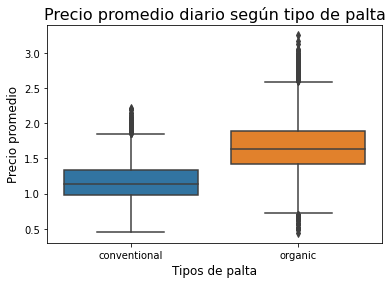

In [ ]:
sns.boxplot(y=df["AveragePrice"], x=df["type"])
plt.title("Precio promedio diario según tipo de palta", size=16)
plt.xlabel('Tipos de palta', fontsize=12)
plt.ylabel('Precio promedio', fontsize=12)
plt.show()


En general, es posible apreciar a simple vista que se consumen muchas más paltas de tipo convencional que orgánicas. Si consideramos además que el precio de las paltas de producción orgánica es más elevado, podríamos establecer una relación entre el precio y su consumo.

Revisaremos a continuación el volumen de paltas vendido anualmente y sus ventas según tamaño.

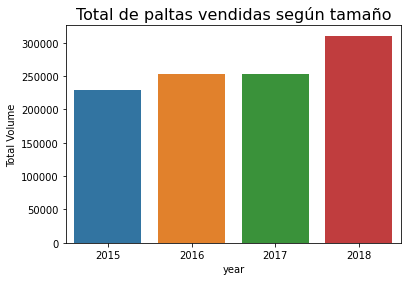

In [ ]:
# Volumen promedio total vendido por año.
sumas2 = df.groupby("year")["Total Volume"].mean()
df_sumas = pd.DataFrame(sumas2)
sns.barplot(x=df_sumas.index, y="Total Volume", data=df_sumas)
plt.title("Total de paltas vendidas según tamaño", size=16)
plt.show()


Como la base de datos está estructurada por información semanal de registro, todas los datos univariados son homogeneos y muestran la cantidad de casos. Es por esta razón que pre procesamos algunas variables antes de ser graficadas. Tal es el caso del grafico que muestra la cantidad de bolsas vendidas según tamaño, donde cada tamaño de bolsa correspondía a una variable del data set. 

Este gráfico muestra que las bolsas más vendidas son las pequeñas. Las bolsas grandes y muy grandes vendidas representan mucho menos casos.

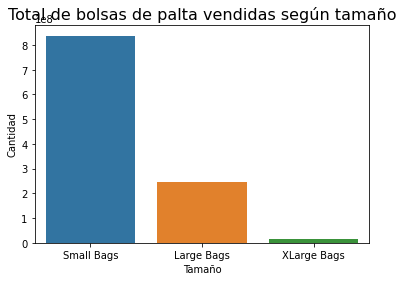

In [ ]:
b1 = df["Small Bags"].sum()
b2 = df["Large Bags"].sum()
b3 = df["XLarge Bags"].sum()
df_sumas = pd.DataFrame([["Small Bags", b1], ["Large Bags", b2], ["XLarge Bags", b3]], columns=["Tamaño", "Cantidad"])
sns.barplot(x="Tamaño", y="Cantidad", data=df_sumas)
plt.title("Total de bolsas de palta vendidas según tamaño", size=16)
plt.show()


Respecto a la variación en el tiempo del precio de las paltas se observa lo siguiente:

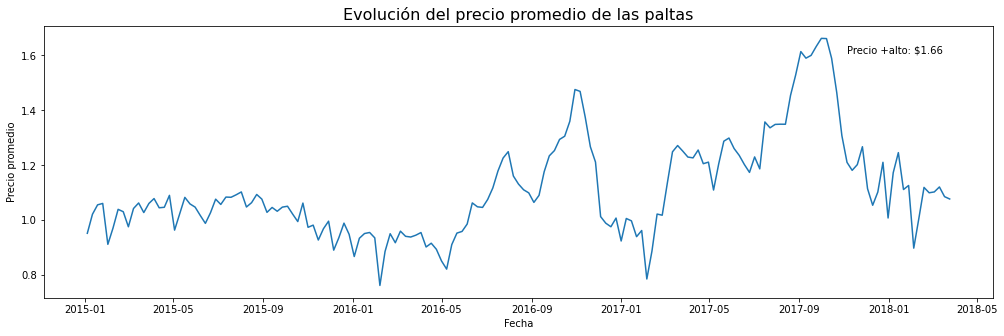

In [ ]:
fig = plt.figure(figsize=(17, 5))
ax = sns.lineplot(x='Fecha', y="Precio promedio", data=paltas)
ax.set_title("Evolución del precio promedio de las paltas", fontsize=16)
Fecha_mas_cara = paltas.loc[paltas['Precio promedio'] == max(
    paltas['Precio promedio'])].Fecha
max_precio = max(paltas['Precio promedio'])
ax.annotate(f'Precio +alto: ${max_precio:,.2f}', (143/169, 0.9),
            xycoords='axes fraction')
plt.show()


Durante el año 2017 se observa un aumento en el precio promedio registrándose alzas significativas a lo largo del periodo. El peak alcanzando fue de USD 1.66 por unidad.

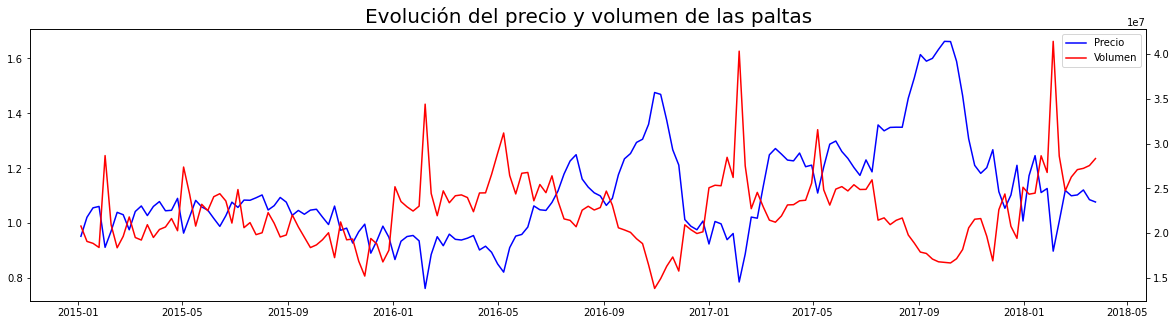

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

lns1 = ax.plot(paltas['Fecha'], paltas["Precio promedio"], label='Precio',
               color='b')
ax2 = ax.twinx()
lns2 = ax2.plot(paltas["Fecha"], paltas["Total Volume"], label='Volumen',
                color="r")
ax.set_title("Evolución del precio y volumen de las paltas", fontsize=20)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()


El Aumento del precio durante dicho año (2017) se debe principalmente a una baja en el volumen de producción de paltas (en rojo), lo que sumado a una demanda creciente elevó los precios hasta su peak.

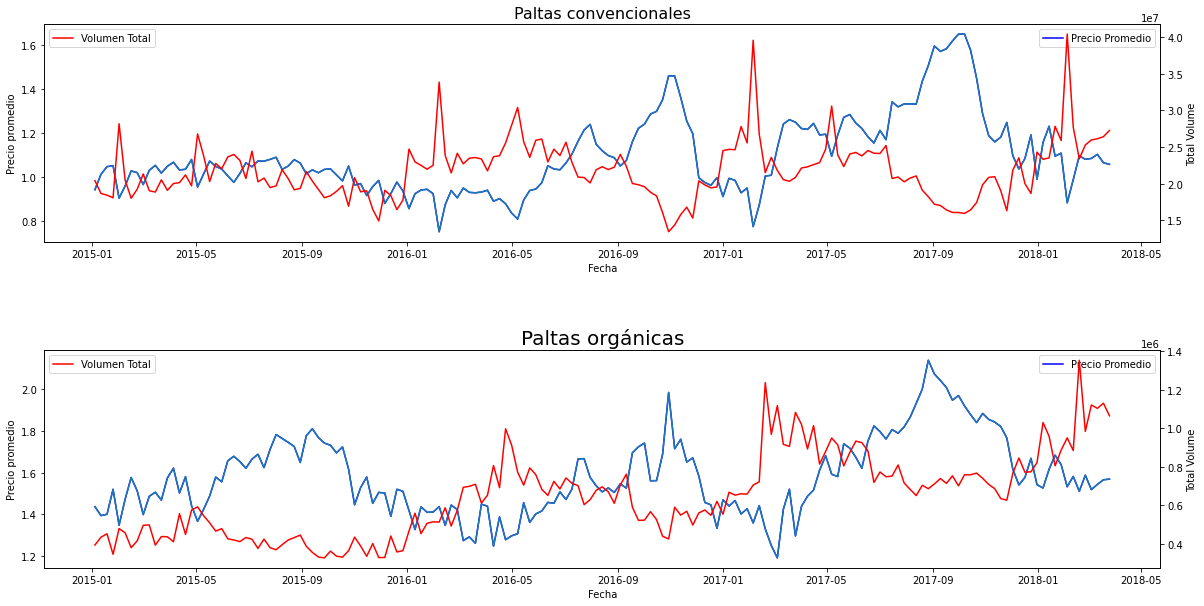

In [ ]:
# Paltas convencionales.
paltas_convencional = df.loc[df['type'] == 'conventional']
paltas_convencional = paltas_convencional.groupby(
    ['Date'])['venta', 'Total Volume'].sum()
paltas_convencional['Precio promedio'] = (
    paltas_convencional['venta']/paltas_convencional['Total Volume'])
paltas_convencional['Fecha'] = fechas_unicas
paltas_convencional['new_index'] = range(len(fechas_unicas))
paltas_convencional = paltas_convencional.set_index('new_index')

fig, ax = plt.subplots(2, 1, figsize=(20, 10), )
sns.lineplot(x='Fecha', y="Precio promedio", data=paltas_convencional,
             ax=ax[0], color="b", label="Precio Promedio")
ax2 = sns.lineplot(x='Fecha', y="Precio promedio", data=paltas_convencional,
                   ax=ax[0]).twinx()
ax2 = sns.lineplot(x="Fecha", y="Total Volume", data=paltas_convencional,
                   ax=ax2, color="r", label="Volumen Total")
ax[0].set_title("Paltas convencionales", fontsize=16)
plt.subplots_adjust(hspace=0.5)

# Paltas orgánicas
paltas_organica = df.loc[df['type'] == 'organic']
paltas_organica = paltas_organica.groupby(
    ['Date'])['venta', 'Total Volume'].sum()
paltas_organica['Precio promedio'] = (
    paltas_organica['venta']/paltas_organica['Total Volume'])
paltas_organica['Fecha'] = fechas_unicas
paltas_organica['new_index'] = range(len(fechas_unicas))
paltas_organica = paltas_organica.set_index('new_index')

sns.lineplot(x='Fecha', y="Precio promedio", data=paltas_organica, ax=ax[1],
             color="b", label="Precio Promedio")
ax2 = sns.lineplot(x='Fecha', y="Precio promedio", data=paltas_organica,
                   ax=ax[1]).twinx()
ax2 = sns.lineplot(x="Fecha", y="Total Volume", data=paltas_organica, ax=ax2,
                   color="r", label="Volumen Total")
ax[1].set_title("Paltas orgánicas", fontsize=20)

plt.show()


Dicho peak se experimentó de manera indistinta al tipo de producción.

Para continuar con el análisis, se plantea la posibilidad de que las fluctuaciones estén afectadas por alguna estacionalidad. De acuerdo a esto, se realizan los siguientes análisis. 

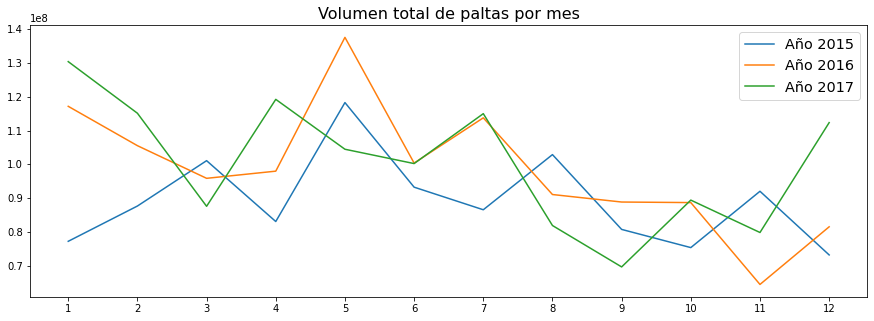

In [ ]:
# Estacionalidad mensual.
fig = plt.subplots(figsize=(15, 5), )

# se quita el 2018 ya que no tiene completa su información.
for x in range(2015, 2018):
    paltas = df.loc[df['year'] == x]
    paltas = paltas.groupby(['mes'])['venta', 'Total Volume'].sum()
    plt.plot(paltas['Total Volume'], label=str('Año ' + str(x)))
plt.title('Volumen total de paltas por mes', fontsize=16)
plt.legend(fontsize="x-large")
plt.xticks(range(1, 13))
plt.show()


<function matplotlib.pyplot.show>

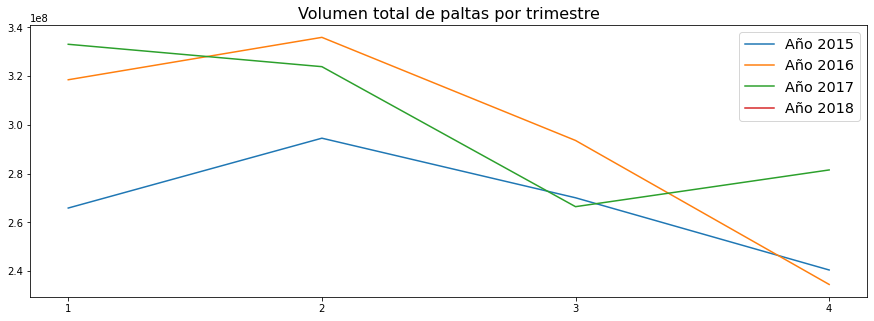

In [ ]:
# Estacionalidad Trimestral.
fig = plt.subplots(figsize=(15, 5), )
for x in range(2015, 2019):
    paltas = df.loc[df['year'] == x]
    paltas = paltas.groupby(['Qtr'])['venta', 'Total Volume', 'Date'].sum()
    plt.plot(paltas['Total Volume'], label=str('Año ' + str(x)))
plt.title('Volumen total de paltas por trimestre', fontsize=16)
plt.legend(fontsize="x-large")
plt.xticks([1, 2, 3, 4])
plt.show


No se observa una clara tendencia mensual, sin embargo al agrupar por trimestres, es posible apreciar una marcada tendencia hacia el primer semestre de cada año.

Otra Variable de interés a analizar son los volumenes de consumo por región.

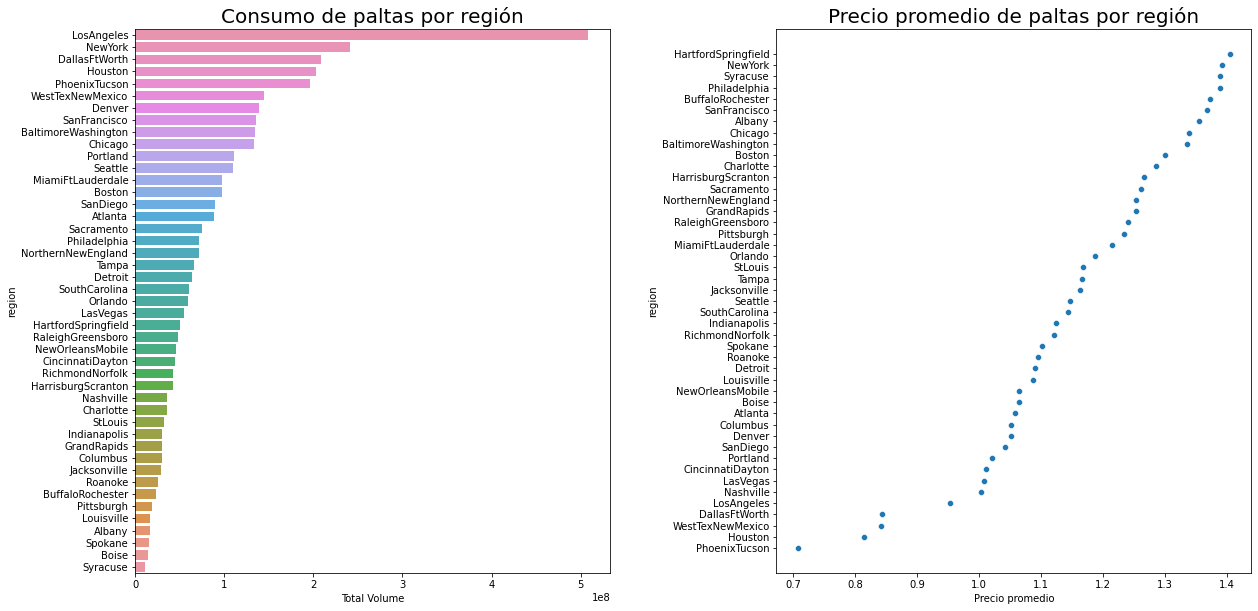

In [ ]:
paltas = df.groupby(['region'])['venta', 'Total Volume', 'region'].sum()
paltas['region'] = df.groupby('region')['region'].nunique().index.tolist()
paltas.sort_values(by='Total Volume', ascending=False)
paltas['Precio promedio'] = paltas['venta']/paltas['Total Volume']

fig, ax = plt.subplots(1, 2, figsize=(20, 10), )

sns.barplot(x='Total Volume', y='region',
            data=paltas.sort_values(by='Total Volume', ascending=True),
            ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Consumo de paltas por región", fontsize=20)

plt.subplots_adjust(wspace=0.35)

sns.scatterplot(x='Precio promedio', y='region',
                data=paltas.sort_values(by='Precio promedio',
                                        ascending=True), ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title("Precio promedio de paltas por región", fontsize=20)

plt.show()


Del primer gráfico se observa, por ejemplo, que 2 de las regiones que más consumen palta son Los Angels y Nueva York. Ahora bien, al observar en el 2do gráfico estas mismas dos regiones, es posible notar que los precio promedios por palta son muy diferentes para cada una. Los Angeles, al estar ubicada en una zona de producción de palta, paga un precio promedio menor en comparación a Nueva York, alejada de cualquier centro de producción de esta producto.

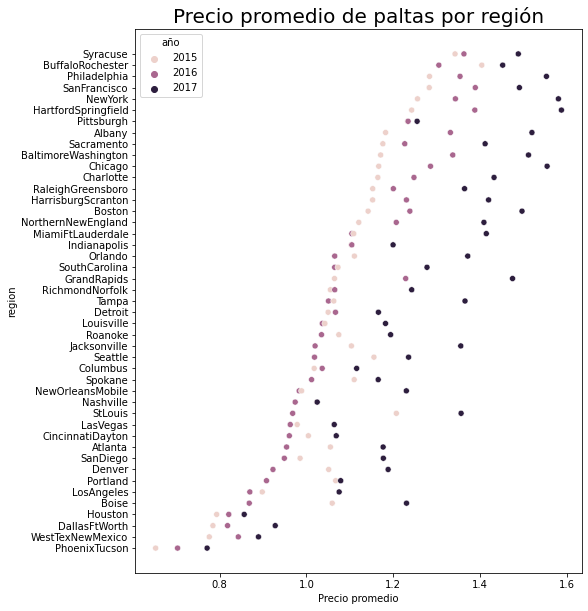

In [ ]:
estados = []
for country in df.groupby('region')['region'].nunique().index.tolist():
    estados.append(country)
    estados.append(country)
    estados.append(country)
    estados.append(country)

paltas = df.groupby(
    ['region', 'year'])['venta', 'Total Volume', 'region'].sum()
paltas['año'] = df.groupby('year')['year'].nunique().index.tolist()*45
paltas['region'] = estados

# se quita el 2018 porque no tiene la información completa, por lo que
# su precio está sesgado.
paltas = paltas[paltas.año != 2018]

paltas['Precio promedio'] = paltas['venta']/paltas['Total Volume']
fig, ax = plt.subplots(figsize=(8, 10), )
ax = sns.scatterplot(x='Precio promedio', y='region', hue='año',
                     data=paltas.sort_values(by='Precio promedio',
                                             ascending=True))
ax.invert_yaxis()
ax.set_title("Precio promedio de paltas por región", fontsize=20)
plt.show()


AL analizar el precio promedio anual para cada región, se puede apreciar una tendencia para los años 2015-2016, en que los precios están ubicados más a la izquierda del eje X, mientras que para 2017 es posible ver que estos han aumentado (más a la derecha del eje X).

# <font color='#ABC510'>🥑Conclusiones generales de las gráficas obtenidas</color>

Se decidió analizar cada una de las variables del conjunto de datos con el fin de poder explorar como vienen determinadas estas, ver la distribución que tienen por si solas y visualizar mediante sus boxplots las medidas de tendencia central de estas y sus valores atípicos de una forma más general. 

Se puede notar que prácticamente la totalidad de las variables del conjunto de datos están muy centradas hacia la derecha, lo que indica que existe una **distribución asimétrica positiva en las variables**, esto se provoca dado que existe mucha concentración de datos en esos rangos de valores, a excepción de la variable *precio promedio unitario*. Esto provoca que visualmente no se pueda interpretar los datos y al momento de visualizar los boxplots señala que existen numerosos datos atípicos.

Dado este suceso se decidió aplicar una **transformación logaritmica** para poder visualizar e interpretar de mejor manera el comportamiento de estos datos y disminuir los valores atípicos que figuran en los *boxplots*. Lo que se busca con la transformación es poder conducir a una **distribución simétrica y más cercana a una distribución normal**, logrando comprimir aquellos valores altos y expandir aquellos pequeños cambiando las longitudes de los datos para poder visualizarlos mejor.



In [ ]:
df1['log_AveragePrice'] = np.log(1 + df1['AveragePrice'])
df1['log_Total Volume'] = np.log(1 + df1['Total Volume'])
df1['log_Avocado Small'] = np.log(1 + df1['Avocado Small'])
df1['log_Avocado Large'] = np.log(1 + df1['Avocado Large'])
df1['log_Avocado Extra-Large'] = np.log(1 + df1['Avocado Extra-Large'])
df1['log_Small Bags'] = np.log(1 + df1['Small Bags'])
df1['log_Large Bags'] = np.log(1 + df1['Large Bags'])
df1['log_XLarge Bags'] = np.log(1 + df1['XLarge Bags'])
df1['log_Total Bags'] = np.log(1 + df1['Total Bags'])

df1 = df1.drop(['AveragePrice', 'Total Volume', 'Avocado Small',
                'Avocado Large', 'Avocado Extra-Large', 'Small Bags',
                'Large Bags', 'XLarge Bags', 'Total Bags'], axis=1)

df1.describe()


,log_AveragePrice,log_Total Volume,log_Avocado Small,log_Avocado Large,log_Avocado Extra-Large,log_Small Bags,log_Large Bags,log_XLarge Bags,log_Total Bags
count,"15,207.0","15,207.0","15,207.0","15,207.0","15,207.0","15,207.0","15,207.0","15,207.0","15,207.0"
mean,0.9,10.9,8.4,9.3,4.5,9.2,6.4,1.9,9.7
std,0.2,2.1,3.2,2.7,3.9,2.4,3.7,3.1,2.0
min,0.4,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.7,9.1,6.3,7.7,0.0,7.5,3.8,0.0,8.2
50%,0.9,11.1,8.4,9.8,4.6,9.7,7.4,0.0,10.1
75%,1.0,12.7,11.2,11.5,8.1,11.1,9.3,3.7,11.3
max,1.4,15.5,14.9,14.6,12.5,14.8,13.5,11.0,14.8


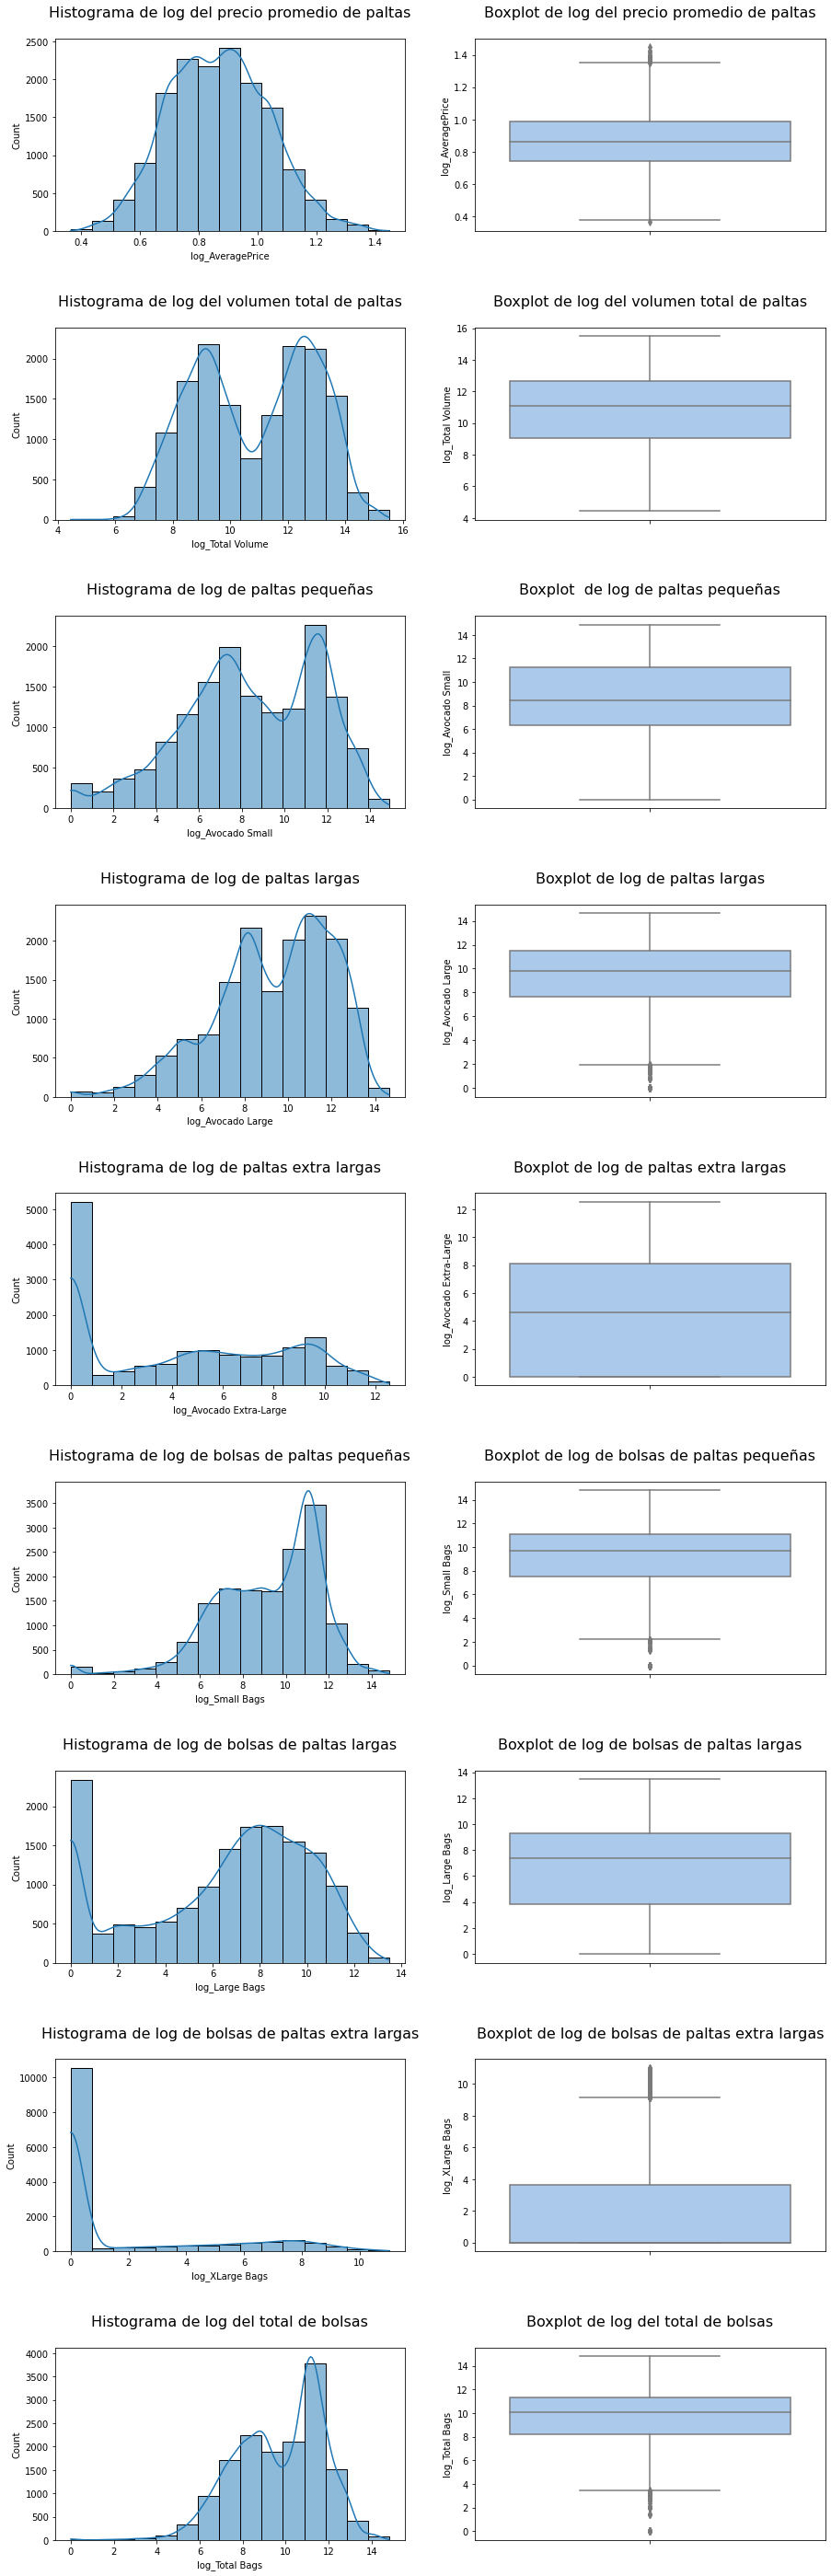

In [ ]:
# Gráficas de distribución de cada variable del conjunto de datos una vez
# aplicada la transformación logaritmica.

fig, ax = plt.subplots(9, 2, figsize=(15, 50))
sns.histplot(x='log_AveragePrice', data=df1, bins=15, kde=True,
             ax=ax[0][0]).set_title(
                 "Histograma de log del precio promedio de paltas\n",
                 fontsize=16)
sns.boxplot(y='log_AveragePrice', data=df1, ax=ax[0][1],
            palette="pastel").set_title(
                "Boxplot de log del precio promedio de paltas\n", fontsize=16)
sns.histplot(x='log_Total Volume', data=df1, bins=15, kde=True,
             ax=ax[1][0]).set_title(
                 "Histograma de log del volumen total de paltas\n",
                 fontsize=16)
sns.boxplot(y='log_Total Volume', data=df1, ax=ax[1][1],
            palette="pastel").set_title(
                "Boxplot de log del volumen total de paltas\n", fontsize=16)
sns.histplot(x='log_Avocado Small', data=df1, bins=15, kde=True,
             ax=ax[2][0]).set_title(
                 "Histograma de log de paltas pequeñas\n", fontsize=16)
sns.boxplot(y='log_Avocado Small', data=df1, ax=ax[2][1],
            palette="pastel").set_title(
                "Boxplot  de log de paltas pequeñas\n", fontsize=16)
sns.histplot(x='log_Avocado Large', data=df1, bins=15, kde=True,
             ax=ax[3][0]).set_title(
                 "Histograma de log de paltas largas\n", fontsize=16)
sns.boxplot(y='log_Avocado Large', data=df1, ax=ax[3][1],
            palette="pastel").set_title(
                "Boxplot de log de paltas largas\n", fontsize=16)

sns.histplot(x='log_Avocado Extra-Large', data=df1, bins=15, kde=True,
             ax=ax[4][0]).set_title(
                 "Histograma de log de paltas extra largas\n", fontsize=16)
sns.boxplot(y='log_Avocado Extra-Large', data=df1, ax=ax[4][1],
            palette="pastel").set_title(
                "Boxplot de log de paltas extra largas\n", fontsize=16)
sns.histplot(x='log_Small Bags', data=df1, bins=15, kde=True,
             ax=ax[5][0]).set_title(
                 "Histograma de log de bolsas de paltas pequeñas\n",
                 fontsize=16)
sns.boxplot(y='log_Small Bags', data=df1, ax=ax[5][1],
            palette="pastel").set_title(
                "Boxplot de log de bolsas de paltas pequeñas\n", fontsize=16)
sns.histplot(x='log_Large Bags', data=df1, bins=15, kde=True,
             ax=ax[6][0]).set_title(
                 "Histograma de log de bolsas de paltas largas\n", fontsize=16)
sns.boxplot(y='log_Large Bags', data=df1, ax=ax[6][1],
            palette="pastel").set_title(
                "Boxplot de log de bolsas de paltas largas\n", fontsize=16)
sns.histplot(x='log_XLarge Bags', data=df1, bins=15, kde=True,
             ax=ax[7][0]).set_title(
                 "Histograma de log de bolsas de paltas extra largas\n",
                 fontsize=16)
sns.boxplot(y='log_XLarge Bags', data=df1, ax=ax[7][1],
            palette="pastel").set_title(
                "Boxplot de log de bolsas de paltas extra largas\n",
                fontsize=16)
sns.histplot(x='log_Total Bags', data=df1, bins=15, kde=True,
             ax=ax[8][0]).set_title(
                 "Histograma de log del total de bolsas\n", fontsize=16)
sns.boxplot(y='log_Total Bags', data=df1, ax=ax[8][1],
            palette="pastel").set_title(
                "Boxplot de log del total de bolsas\n", fontsize=16)

plt.subplots_adjust(hspace=0.5)

plt.show()


Con el análisis para cada variable transformada se incorpora además sus medidas de tendencia central incorporadas al gráfico de cajas.

Los límites superior e inferior de cada gráfico se muestran en color azul, e indican el rango intercuartílico de cada variable, utilizado para observar los datos atípicos (corte).

Los cuartiles (1er y 3ero) están identificados con color rojo e indican los puntos en los que se concentran el 50% de los datos  (límite del 25 y 75 porciento de los datos respectivamente).

Finalmente, las medidas de tendencia central están en color verde.

In [ ]:
def annotations(plot, df, type):
    if(type == 'promedio'):
        xy = (1 - width/2, df.mean())
        xytext = (1 - width*3, df.mean())
        ax[plot].annotate(s=str(round(df.mean(), 1)) + '\nPromedio', xy=xy,
                          xytext=xytext, xycoords=xycoords,
                          arrowprops=arrowprops, color='green')
    elif(type == 'cuartil1'):
        xy = (1 - width/2, df.quantile(0.25))
        xytext = (1 - width*4, df.quantile(0.25))
        ax[plot].annotate(s=str(round(
            df.quantile(0.25), 1)) + '\nPrimer Cuartil', xy=xy, xytext=xytext,
            xycoords=xycoords, arrowprops=arrowprops, color='red')
    elif(type == 'mediana'):
        xy = (1 + width/2, df.median())
        xytext = (1 + width*3, df.median())
        ax[plot].annotate(s=str(round(df.median(), 1)) + '\nMediana', xy=xy,
                          xytext=xytext, xycoords=xycoords,
                          arrowprops=arrowprops, color='green')
    elif(type == 'cuartil3'):
        xy = (1 + width/2, df.quantile(0.75))
        xytext = (1 + width*3, df.quantile(0.75))
        ax[plot].annotate(s=str(round(df.quantile(0.75), 1)) +
                          '\nTercer Cuartil', xy=xy, xytext=xytext,
                          xycoords=xycoords, arrowprops=arrowprops,
                          color='red')
    elif(type == 'outliers'):
        Cuartil1 = df.quantile(0.25)
        Cuartil3 = df.quantile(0.75)
        IQR = Cuartil3 - Cuartil1
        Lim_inf = Cuartil1 - (1.5 * IQR)
        Lim_sup = Cuartil3 + (1.5 * IQR)
        xy = (1 - width/2, Lim_inf)
        xytext = (1 - width*4, Lim_inf)
        ax[plot].annotate(s=str(round(Lim_inf, 1)) + '\nLimite Inferior',
                          xy=xy, xytext=xytext, xycoords=xycoords,
                          arrowprops=arrowprops, color='blue')
        xy = (1 - width/2, Lim_sup)
        xytext = (1 - width*4, Lim_sup)
        ax[plot].annotate(
            s=str(round(Lim_sup, 1)) + '\nLimite Superior', xy=xy,
            xytext=xytext, xycoords=xycoords, arrowprops=arrowprops,
            color='blue')


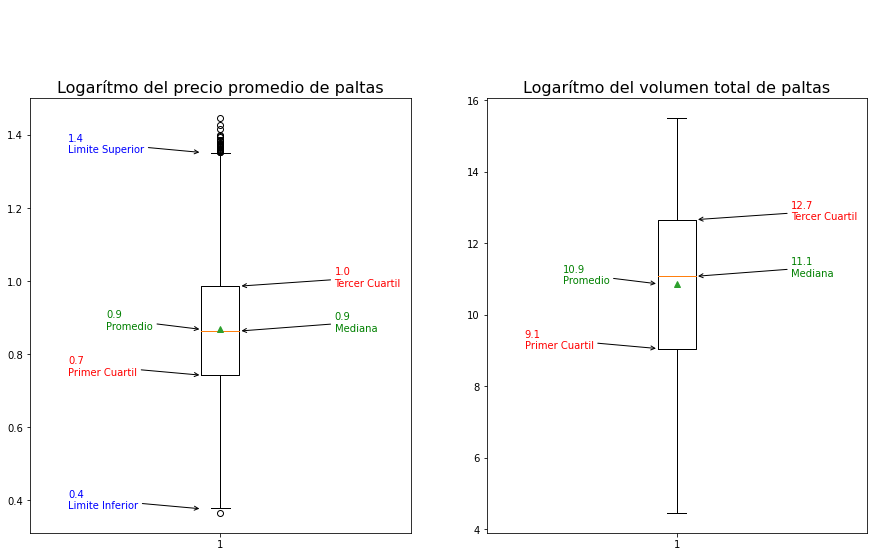

In [ ]:
width = 0.1
xycoords = "data"
# Añadimos el diccionario utilizando la funcion de construccion dict.
arrowprops = dict(arrowstyle="->", connectionstyle="arc3")
# Definimos un subplot de fila 1, columna 1 y detallamos su largo ancho.
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].boxplot(df1['log_AveragePrice'], widths=width, showmeans=True)
ax[1].boxplot(df1['log_Total Volume'], widths=width, showmeans=True)

ax[0].set_title("Logarítmo del precio promedio de paltas", size=16)
ax[1].set_title("Logarítmo del volumen total de paltas", size=16)

annotations(0, df1['log_AveragePrice'], 'promedio')
annotations(1, df1['log_Total Volume'], 'promedio')
annotations(0, df1['log_AveragePrice'], 'cuartil1')
annotations(1, df1['log_Total Volume'], 'cuartil1')
annotations(0, df1['log_AveragePrice'], 'mediana')
annotations(1, df1['log_Total Volume'], 'mediana')
annotations(0, df1['log_AveragePrice'], 'cuartil3')
annotations(1, df1['log_Total Volume'], 'cuartil3')
annotations(0, df1['log_AveragePrice'], 'outliers')
annotations(1, df1['log_Total Volume'], 'outliers')

plt.show()


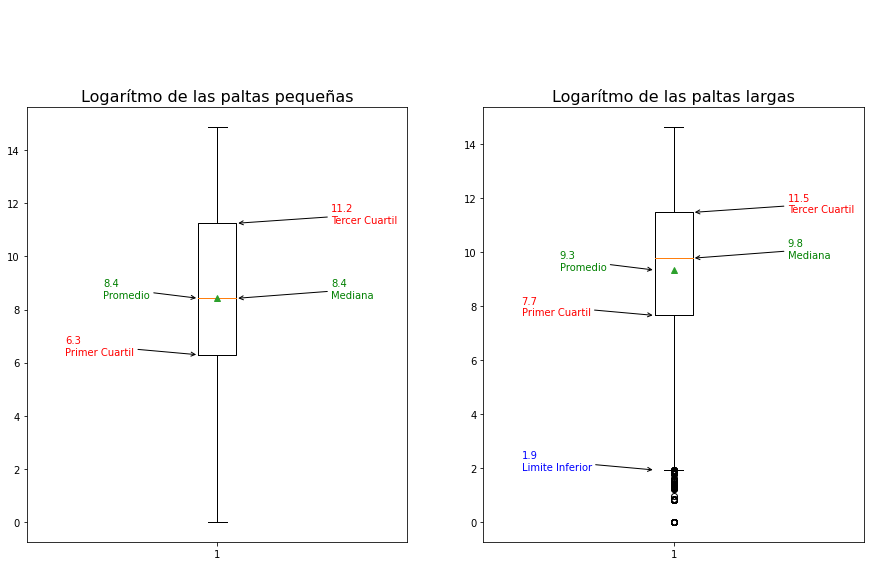

In [ ]:
width = 0.1
xycoords = "data"
arrowprops = dict(arrowstyle="->", connectionstyle="arc3")
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].boxplot(df1['log_Avocado Small'], widths=width, showmeans=True)
ax[1].boxplot(df1['log_Avocado Large'], widths=width, showmeans=True)

ax[0].set_title("Logarítmo de las paltas pequeñas", size=16)
ax[1].set_title("Logarítmo de las paltas largas", size=16)

annotations(0, df1['log_Avocado Small'], 'promedio')
annotations(1, df1['log_Avocado Large'], 'promedio')
annotations(0, df1['log_Avocado Small'], 'cuartil1')
annotations(1, df1['log_Avocado Large'], 'cuartil1')
annotations(0, df1['log_Avocado Small'], 'mediana')
annotations(1, df1['log_Avocado Large'], 'mediana')
annotations(0, df1['log_Avocado Small'], 'cuartil3')
annotations(1, df1['log_Avocado Large'], 'cuartil3')
annotations(0, df1['log_Avocado Small'], 'outliers')
annotations(1, df1['log_Avocado Large'], 'outliers')

plt.show()


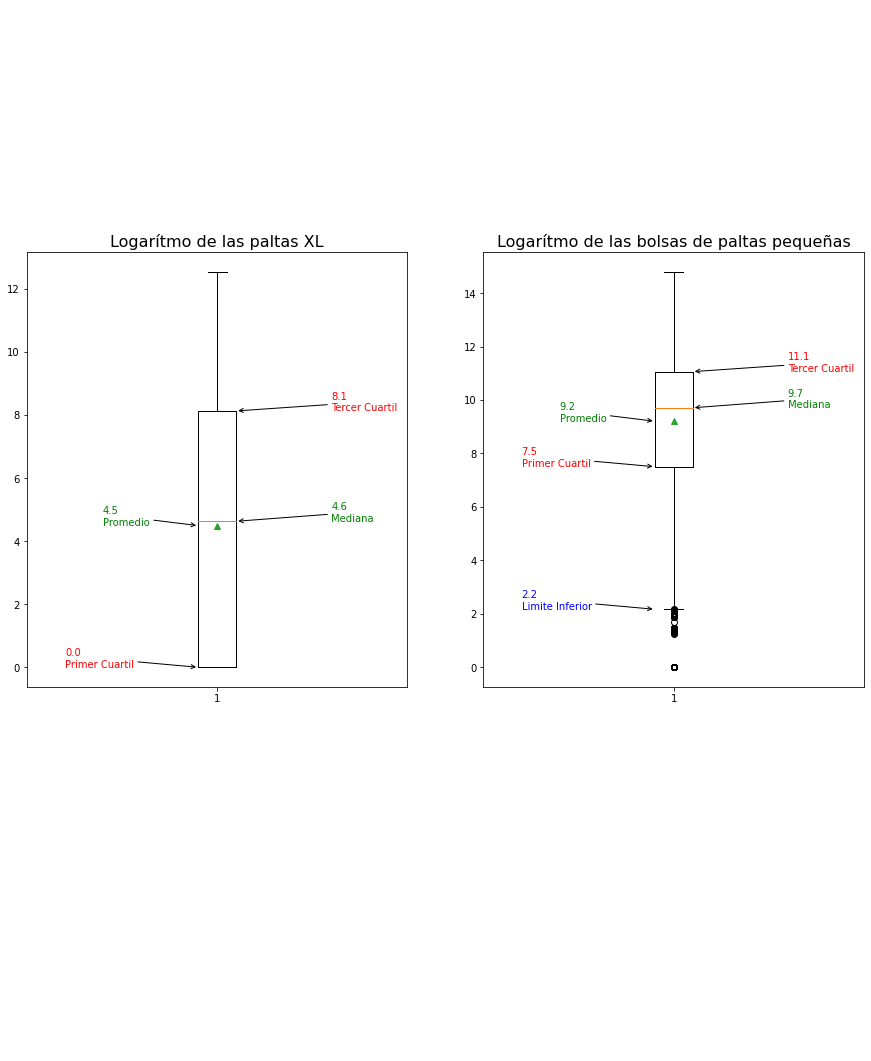

In [ ]:
width = 0.1
xycoords = "data"
arrowprops = dict(arrowstyle="->", connectionstyle="arc3")
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].boxplot(df1['log_Avocado Extra-Large'], widths=width, showmeans=True)
ax[1].boxplot(df1['log_Small Bags'], widths=width, showmeans=True)

ax[0].set_title("Logarítmo de las paltas XL", size=16)
ax[1].set_title("Logarítmo de las bolsas de paltas pequeñas", size=16)

annotations(0, df1['log_Avocado Extra-Large'], 'promedio')
annotations(1, df1['log_Small Bags'], 'promedio')
annotations(0, df1['log_Avocado Extra-Large'], 'cuartil1')
annotations(1, df1['log_Small Bags'], 'cuartil1')
annotations(0, df1['log_Avocado Extra-Large'], 'mediana')
annotations(1, df1['log_Small Bags'], 'mediana')
annotations(0, df1['log_Avocado Extra-Large'], 'cuartil3')
annotations(1, df1['log_Small Bags'], 'cuartil3')
annotations(0, df1['log_Avocado Extra-Large'], 'outliers')
annotations(1, df1['log_Small Bags'], 'outliers')

plt.show()


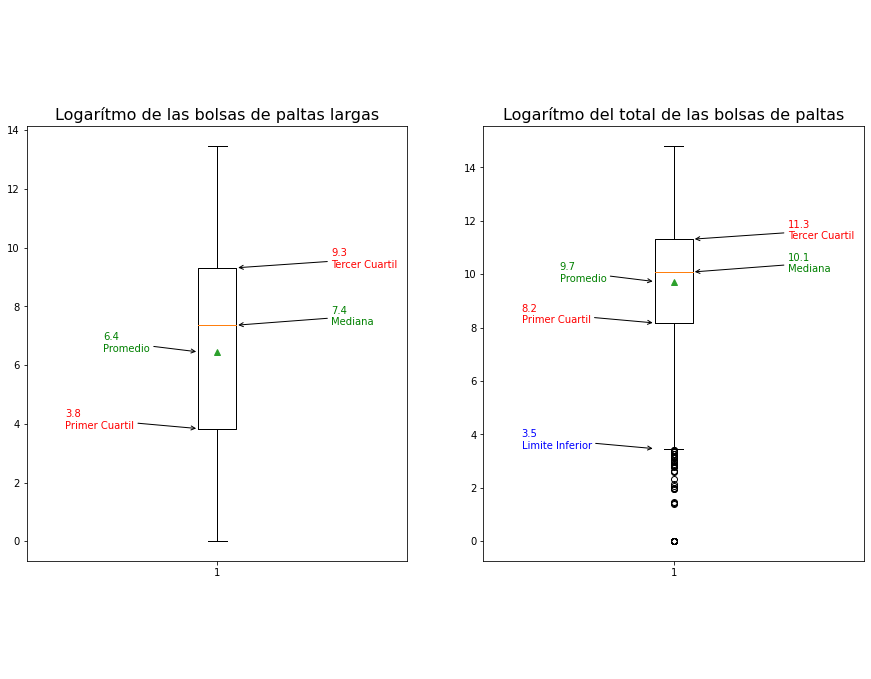

In [ ]:
width = 0.1
xycoords = "data"
arrowprops = dict(arrowstyle="->", connectionstyle="arc3")
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].boxplot(df1['log_Large Bags'], widths=width, showmeans=True)
ax[1].boxplot(df1['log_Total Bags'], widths=width, showmeans=True)

ax[0].set_title("Logarítmo de las bolsas de paltas largas", size=16)
ax[1].set_title("Logarítmo del total de las bolsas de paltas", size=16)

annotations(0, df1['log_Large Bags'], 'promedio')
annotations(1, df1['log_Total Bags'], 'promedio')
annotations(0, df1['log_Large Bags'], 'cuartil1')
annotations(1, df1['log_Total Bags'], 'cuartil1')
annotations(0, df1['log_Large Bags'], 'mediana')
annotations(1, df1['log_Total Bags'], 'mediana')
annotations(0, df1['log_Large Bags'], 'cuartil3')
annotations(1, df1['log_Total Bags'], 'cuartil3')
annotations(0, df1['log_Large Bags'], 'outliers')
annotations(1, df1['log_Total Bags'], 'outliers')

plt.show()


# <font color='#ABC510'>🥑Regresión Lineal Simple</color>

### Exploración inicial de los Datos

Para este Data Set, crearemos un modelo de regresion que nos permita predecir la variable *Precio Promedio*.

Antes de ajustar algún modelo, exploraremos las distintas variables y afectan a nuestra variable dependiente mediante el uso de scatter plots.

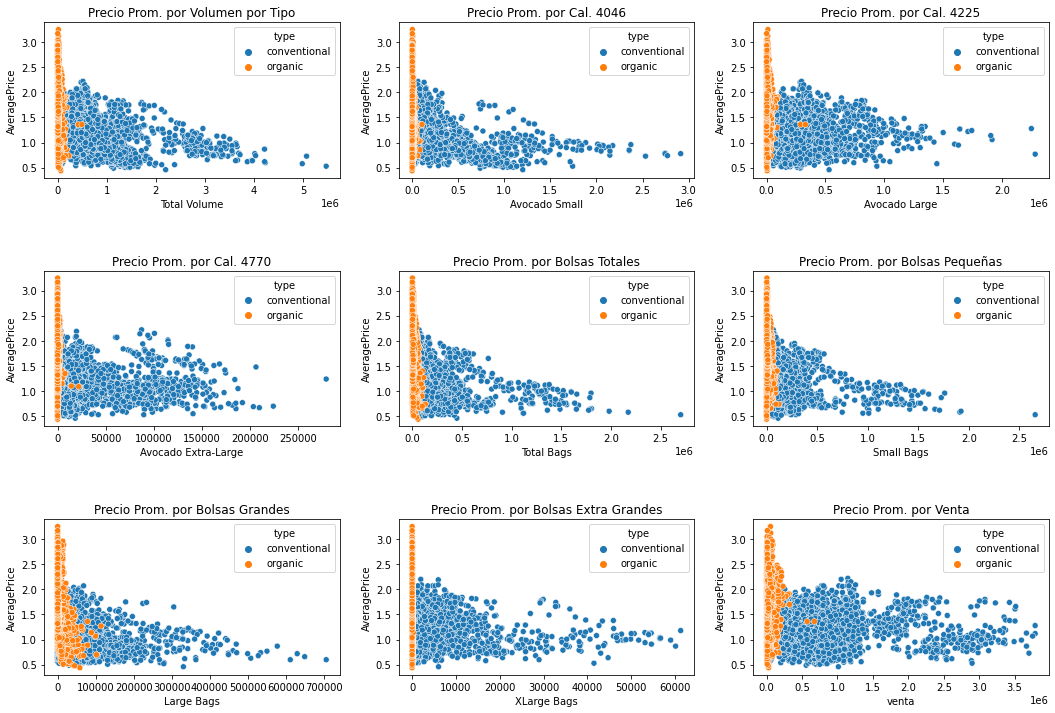

In [ ]:
df_reg = df

fig, ax = plt.subplots(3, 3, figsize=(18, 12), )

sns.scatterplot(x="Total Volume", y="AveragePrice", data=df_reg, ci='sd',
                hue='type', ax=ax[0, 0])
ax[0, 0].set_title("Precio Prom. por Volumen por Tipo", fontsize=12)

sns.scatterplot(x="Avocado Small", y="AveragePrice", data=df_reg, ci='sd',
                hue='type', ax=ax[0, 1])
ax[0, 1].set_title("Precio Prom. por Cal. 4046", fontsize=12)

sns.scatterplot(x="Avocado Large", y="AveragePrice", data=df_reg, ci='sd',
                hue='type', ax=ax[0, 2])
ax[0, 2].set_title("Precio Prom. por Cal. 4225", fontsize=12)

sns.scatterplot(x="Avocado Extra-Large", y="AveragePrice", data=df_reg,
                ci='sd', hue='type', ax=ax[1, 0])
ax[1, 0].set_title("Precio Prom. por Cal. 4770", fontsize=12)

sns.scatterplot(x="Total Bags", y="AveragePrice", data=df_reg, ci='sd',
                hue='type', ax=ax[1, 1])
ax[1, 1].set_title("Precio Prom. por Bolsas Totales", fontsize=12)

sns.scatterplot(x="Small Bags", y="AveragePrice", data=df_reg, ci='sd',
                hue='type', ax=ax[1, 2])
ax[1, 2].set_title("Precio Prom. por Bolsas Pequeñas", fontsize=12)

sns.scatterplot(x="Large Bags", y="AveragePrice", data=df_reg, ci='sd',
                hue='type', ax=ax[2, 0])
ax[2, 0].set_title("Precio Prom. por Bolsas Grandes", fontsize=12)

sns.scatterplot(x="XLarge Bags", y="AveragePrice", data=df_reg, ci='sd',
                hue='type', ax=ax[2, 1])
ax[2, 1].set_title("Precio Prom. por Bolsas Extra Grandes", fontsize=12)

sns.scatterplot(x="venta", y="AveragePrice", data=df_reg, ci='sd',
                hue='type', ax=ax[2, 2])
ax[2, 2].set_title("Precio Prom. por Venta", fontsize=12)

plt.subplots_adjust(hspace=0.6)
plt.show()


**Nota**:  De los graficos generados para del Data Set, podemos ver que estos se encuentran en su mayoría concentrados en las unidades más bajas del eje.  Esto puede tener un efecto en la correlación de las variables, mermando la capacidad predictiva de cualquier modelo que quiera ajustarse.  Para trabajar esta concentración en los datos, se recomienda realizar algún tipo de transfomación, y en este caso en particular, se considerará el uso del logaritmo.

### Creación de Data Sets Auxiliares

Considerando la transformación antes planteada, y para evidenciar el efecto de ésta en la regresión, se crearán 2 Data Sets auxiliares.

Cada uno tendrá las mismas variables, sin embargo el primero (definido como *df_org*) conservará las variables originales, mientras que el segundo (definido como *df_log*) tendrá las variables transformadas con logaritmo.

Además de esa transformación, se agregarán 2 columnas que buscarán reemplazar la variable categórica *type* de nuestro Data Set por variables numéricas.

In [ ]:
df_reg = pd.get_dummies(df, columns=['type'])

# nota: Las Columnas indican si el registro es o no de producción
# Organica/Convencional según corresponda

df_orig = df_reg

df_log = pd.DataFrame()

# Creamos variables auxiliares para trabajar mejor con los datos en los
# histogramas. Para esto transformamos algunos campos en log para facilitar
# la compresión de los gráficos asociados.
df_log['Date'] = df_reg['Date']
df_log['AveragePrice'] = df_reg['AveragePrice']
df_log['log_TotalVolume'] = np.log(1 + df_reg['Total Volume'])
df_log['log_4046'] = np.log(1 + df_reg['Avocado Small'])
df_log['log_4225'] = np.log(1 + df_reg['Avocado Large'])
df_log['log_4770'] = np.log(1 + df_reg['Avocado Extra-Large'])
df_log['log_TotalBags'] = np.log(1 + df_reg['Total Bags'])
df_log['log_SmallBags'] = np.log(1 + df_reg['Small Bags'])
df_log['log_LargeBags'] = np.log(1 + df_reg['Large Bags'])
df_log['log_XLargeBags'] = np.log(1 + df_reg['XLarge Bags'])
df_log['year'] = df_reg['year']
df_log['region'] = df_reg['region']
df_log['log_venta'] = np.log(1 + df_reg['venta'])
df_log['type_conventional'] = df_reg['type_conventional']
df_log['type_organic'] = df_reg['type_organic']


Con los Data Sets auxiliares, podemos analizar las correlaciones de cada uno y obtener conclusiones preliminares sobre nuestras transformaciones.

Se calculan las correlaciones de las variables y se dibuja el mapa de calor para visualizar la intensidad de las correlaciones en cada variable.

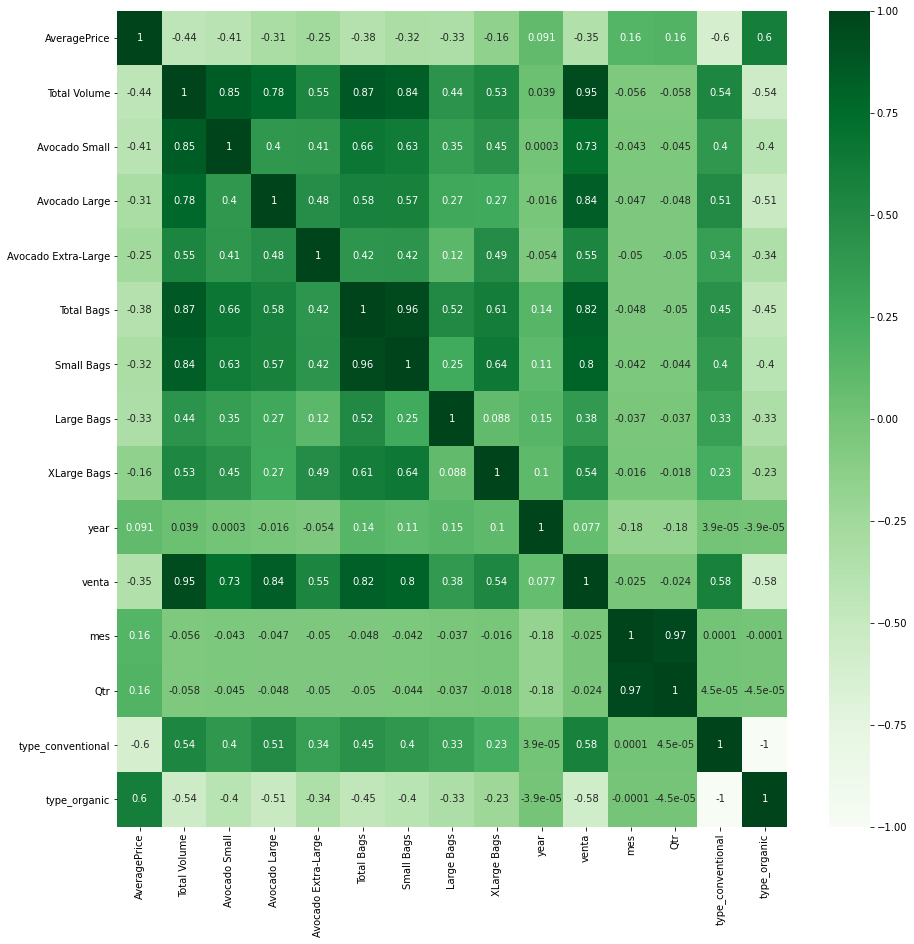

In [ ]:
correlation_mat = df_orig.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_mat, cmap='Greens', annot=True)
plt.show()


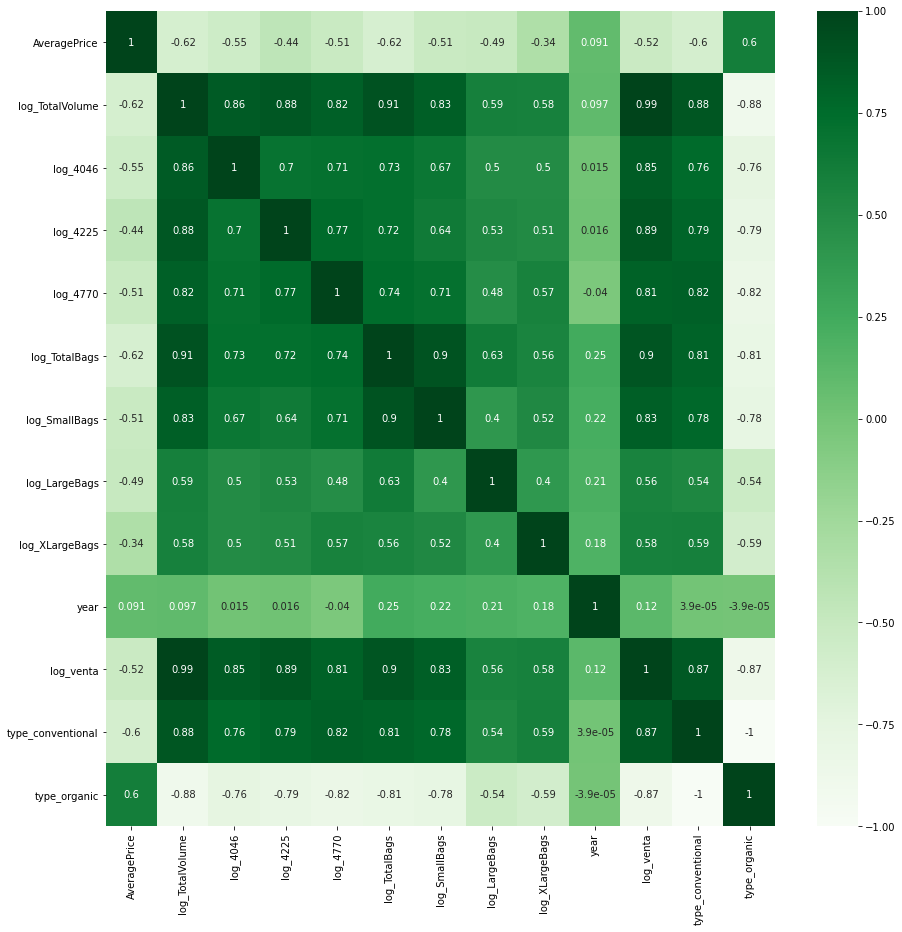

In [ ]:
correlation_mat = df_log.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_mat, cmap='Greens', annot=True)
plt.show()


Si consideramos como nuestra variable dependiente el *Precio Promedio*, se observa que las variables mejoraron su correlación una vez realizada la transformación en logaritmo. Con esta información, se generarán las regresiones y se realizaran las comparativas para dimensionar el mismo efecto en los modelos.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

pd.set_option('float_format', '{:,.4f}'.format)


##### 1. Regresión - *Volumen Total*

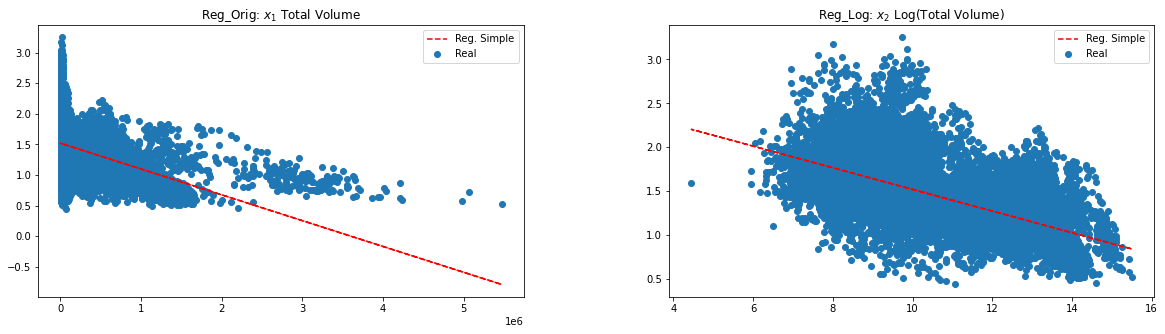

,Reg_Orig,Reg_Log
R2,0.1971,0.3796
MSE,0.1368,0.1057
MAE,0.2934,0.2504
MAPE,0.2270,0.1884


In [ ]:
x1 = df_orig['Total Volume']
x2 = df_log['log_TotalVolume']
y = df_orig['AveragePrice']

# Transforma las series en arrays
x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

# Genera las Regresiones
df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

# Calcular estadíticos de Prueba y se anexan a DF

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

# Se Imprimen los gráficos y estadísticos de ambos Data Sets auxiliares

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Total Volume")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Total Volume)")
ax.legend()

plt.show()
estad


##### 2. Regresión - *Calibre 4046*

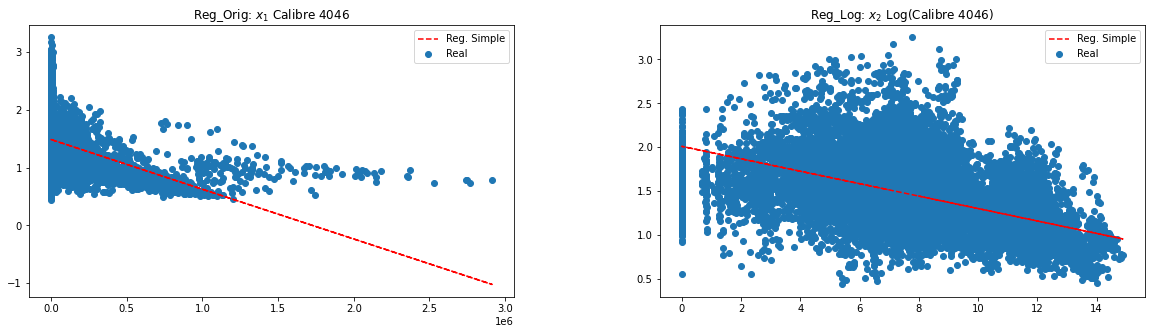

,Reg_Orig,Reg_Log
R2,0.1709,0.3002
MSE,0.1413,0.1193
MAE,0.2961,0.2646
MAPE,0.2263,0.1992


In [ ]:
x1 = df_orig['Avocado Small']
x2 = df_log['log_4046']
y = df_orig['AveragePrice']

x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Calibre 4046")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Calibre 4046)")
ax.legend()

plt.show()
estad


##### 3. Regresión - *Calibre 4225*

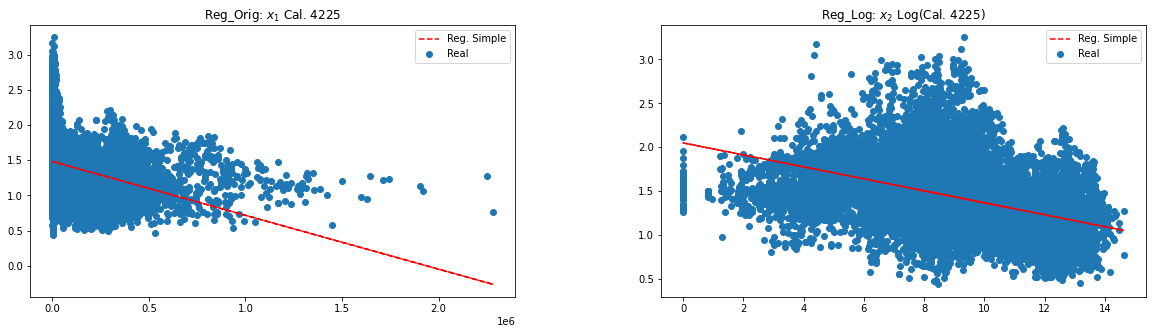

,Reg_Orig,Reg_Log
R2,0.0953,0.1979
MSE,0.1542,0.1367
MAE,0.3139,0.2887
MAPE,0.2458,0.2211


In [ ]:
x1 = df_orig['Avocado Large']
x2 = df_log['log_4225']
y = df_orig['AveragePrice']

x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Cal. 4225")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Cal. 4225)")
ax.legend()

plt.show()
estad


##### 4. Regresión - *Calibre 4770*

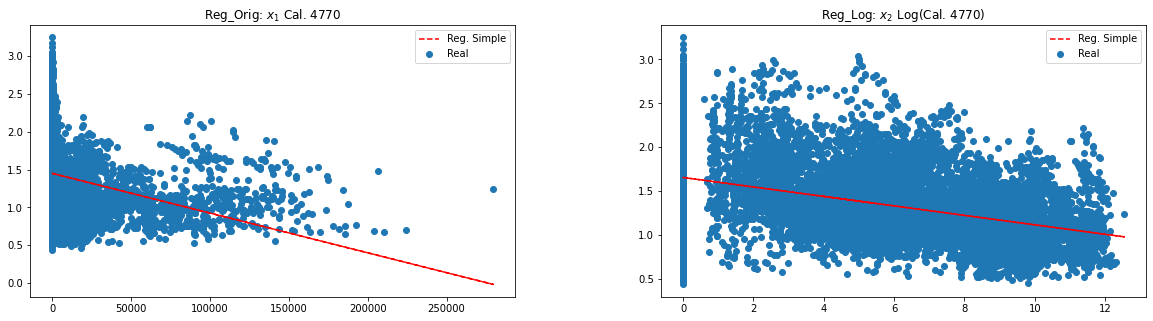

,Reg_Orig,Reg_Log
R2,0.0640,0.2615
MSE,0.1595,0.1258
MAE,0.3178,0.2738
MAPE,0.2485,0.2089


In [ ]:
x1 = df_orig['Avocado Extra-Large']
x2 = df_log['log_4770']
y = df_orig['AveragePrice']

x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Cal. 4770")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Cal. 4770)")
ax.legend()

plt.show()
estad


##### 5. Regresión - *Bolsas Totales*

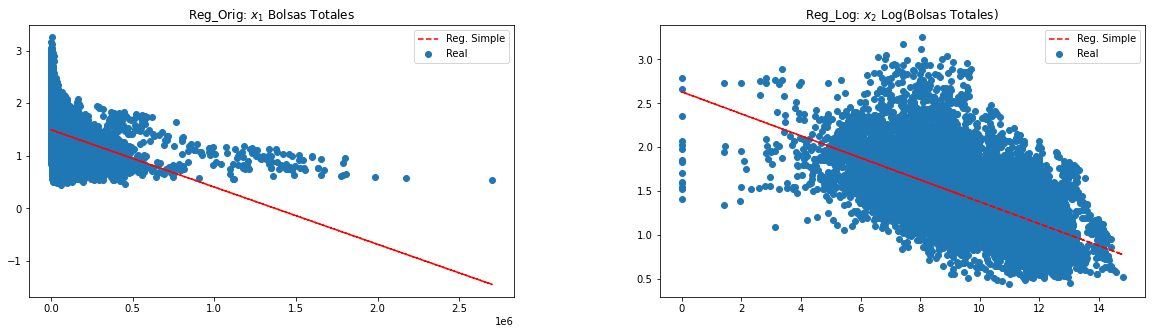

,Reg_Orig,Reg_Log
R2,0.1434,0.3834
MSE,0.1460,0.1051
MAE,0.3026,0.2503
MAPE,0.2365,0.1894


In [ ]:
x1 = df_orig['Total Bags']
x2 = df_log['log_TotalBags']
y = df_orig['AveragePrice']

x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Bolsas Totales")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Bolsas Totales)")
ax.legend()

plt.show()
estad


##### 6. Regresión - *Bolsas Pequeñas*

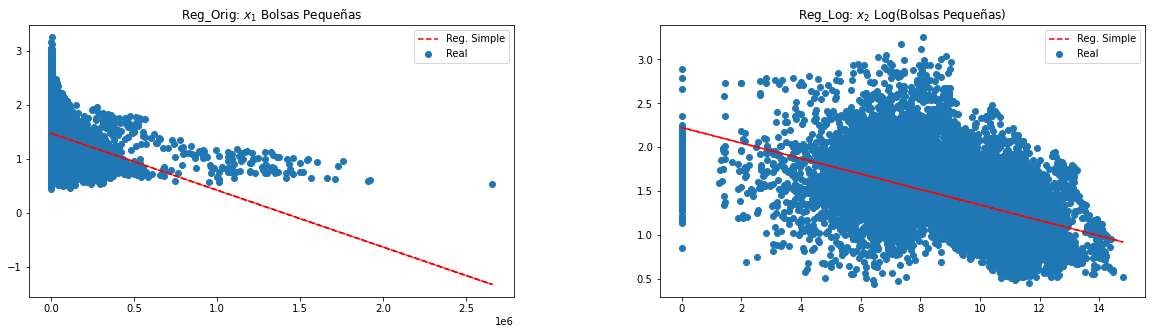

,Reg_Orig,Reg_Log
R2,0.1015,0.2616
MSE,0.1531,0.1258
MAE,0.3112,0.2747
MAPE,0.2444,0.2109


In [ ]:
x1 = df_orig['Small Bags']
x2 = df_log['log_SmallBags']
y = df_orig['AveragePrice']

x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Bolsas Pequeñas")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Bolsas Pequeñas)")
ax.legend()

plt.show()
estad


##### 7. Regresión - *Bolsas Grandes*

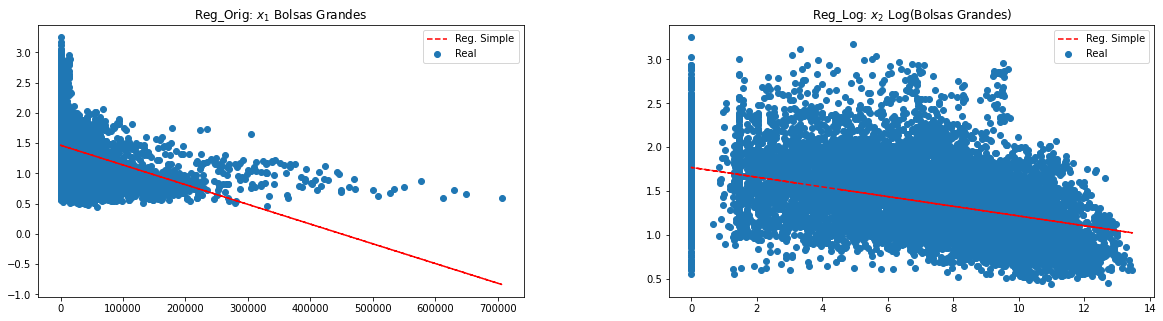

,Reg_Orig,Reg_Log
R2,0.1113,0.2442
MSE,0.1514,0.1288
MAE,0.3097,0.2789
MAPE,0.2406,0.2139


In [ ]:
x1 = df_orig['Large Bags']
x2 = df_log['log_LargeBags']
y = df_orig['AveragePrice']

x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Bolsas Grandes")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Bolsas Grandes)")
ax.legend()

plt.show()
estad


##### 8. Regresión - *Bolsas Extra Grandes*

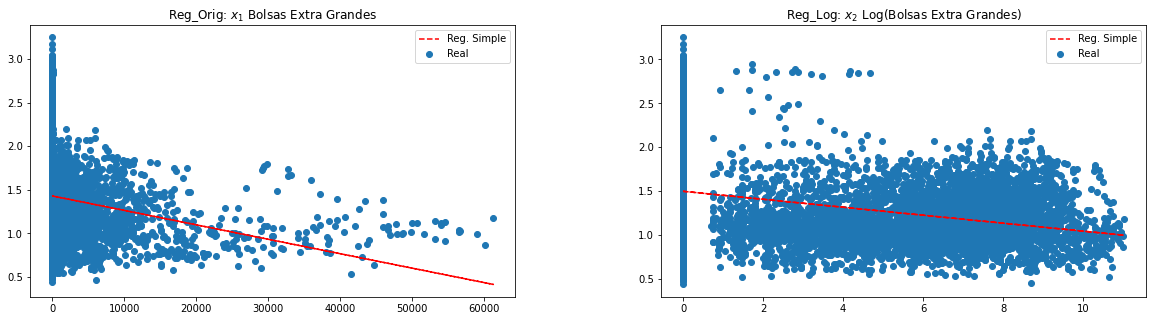

,Reg_Orig,Reg_Log
R2,0.0242,0.1159
MSE,0.1663,0.1507
MAE,0.3271,0.3080
MAPE,0.2568,0.2405


In [ ]:
x1 = df_orig['XLarge Bags']
x2 = df_log['log_XLargeBags']
y = df_orig['AveragePrice']

x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Bolsas Extra Grandes")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Bolsas Extra Grandes)")
ax.legend()

plt.show()
estad


##### 9. Regresión - *Ventas*

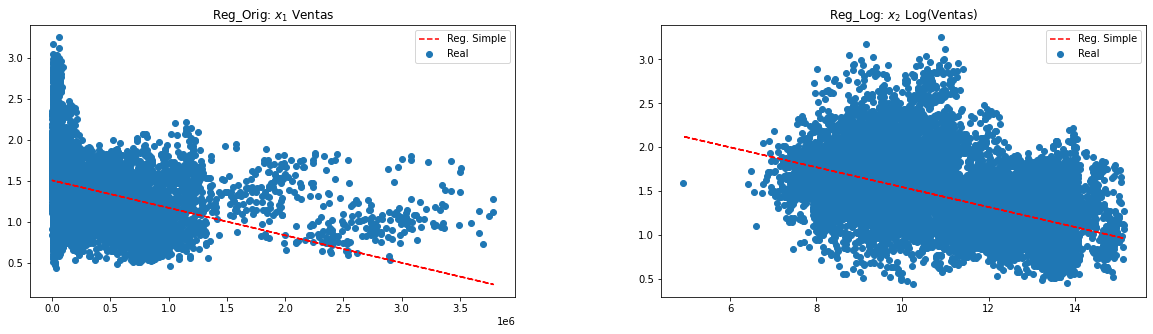

,Reg_Orig,Reg_Log
R2,0.1250,0.2697
MSE,0.1491,0.1245
MAE,0.3079,0.2730
MAPE,0.2404,0.2086


In [ ]:
x1 = df_orig['venta']
x2 = df_log['log_venta']
y = df_orig['AveragePrice']

x1 = np.array(x1)
x1 = x1.reshape(-1, 1)
x2 = np.array(x2)
x2 = x2.reshape(-1, 1)
y = y.values

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)
df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log

grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)
plt.figure(figsize=(20, 5))

ax = plt.subplot(grid[0])
ax.scatter(x1, y, label="Real")
ax.plot(x1, df_pred1, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Orig: $x_1$ Ventas")
ax.legend()

ax = plt.subplot(grid[1])
ax.scatter(x2, y, label="Real")
ax.plot(x2, df_pred2, "--", color="red", label="Reg. Simple")
ax.set_title("Reg_Log: $x_2$ Log(Ventas)")
ax.legend()

plt.show()
estad


De las regresiones simples analizadas, la variable que mejor explica el precio promedio es *Bolsas Totales*, seguida por la variable *Volumen Total*. En todos los casos, y a pesar de que las variables no son lo suficientemente buenas por sí solas para ajustar un modelo, sí se observa una mejora en la capacidad predictiva al comparar los R2 vs la transformación logarítmica.

**<h2><font color='#ABC510'>🥑Regresión Lineal Múltiple</font></h2>**

De igual manera a la sección anterior, utilizaremos 2 Data Frames, una copia del original y uno con los valores transformados a Logaritmo.

In [ ]:
x1 = df_orig.drop(['AveragePrice', 'Date', 'region'], axis=1)
x2 = df_log.drop(['AveragePrice', 'Date', 'region'], axis=1)
y = df_orig['AveragePrice']

df_reg1 = lr.fit(x1, y)
df_pred1 = df_reg1.predict(x1)

df_reg2 = lr.fit(x2, y)
df_pred2 = df_reg2.predict(x2)


In [ ]:
# Calcular estadíticos de Prueba

MSE1 = mean_squared_error(y, df_pred1)
MAE1 = mean_absolute_error(y, df_pred1)
R_21 = r2_score(y, df_pred1)
MAPE1 = np.sum(np.abs((y - df_pred1)/y)) / len(y)

MSE2 = mean_squared_error(y, df_pred2)
MAE2 = mean_absolute_error(y, df_pred2)
R_22 = r2_score(y, df_pred2)
MAPE2 = np.sum(np.abs((y - df_pred2)/y)) / len(y)

orig = [R_21, MSE1, MAE1, MAPE1]
log = [R_22, MSE2, MAE2, MAPE2]

indice = (['R2', 'MSE', 'MAE', 'MAPE'])

estad = pd.DataFrame(index=indice)
estad['Reg_Orig'] = orig
estad['Reg_Log'] = log
estad


,Reg_Orig,Reg_Log
R2,0.5174,0.9653
MSE,0.0822,0.0059
MAE,0.2090,0.0526
MAPE,0.1532,0.0420


Al incorporar la totalidad  de los datos en un modelo de regresión múltiple, se observa un mejora significativa en la capacidad predictora del modelo, esto indica que las variables e su conjunto explican de mejor manera el precio promedio (nuestra variable dependiente).

A pesar de esto, es necesario tener en consideración que el elevado resultado del R2 se debe en gran medida a que para ajustar el modelo se han utilizado la totalidad de los datos, generando un sobreajuste. 

**<h2><font color='#ABC510'>🥑Conclusiones</font></h2>**

1.    Como conclusión general de un análisis de datos, notamos la importancia de realizar una correcta limpieza de los datos a trabajar, la utilidad y relevancia de realizar un análisis exploratorio previo a cada una de las variables en estudio con el fin de interiorizarse en el tema a analizar y con esto poder ir visualizando las variables que serán de utilidad en el análisis como también el buscar soluciones para poder tratar aquellas variables que no se encuentran en una misma escala de medición y plantear soluciones para poder trabajar con este tipo de datos, como en este caso se realizó aplicando una transformación logarítmicas a las variables, lo que nos dió una mejor comprensión de su distribución y nos permitió mejorar los resultados en todo el análisis realizado.

2.    Los primeros análisis que se realizaron en el presente caso, mostraron diferencias significativas cuando se realizaban comparativas con el parámetro "*region*" (en histogramas comparartivos). Estas diferencias condujeron a una investigación que evidenció la falta de un campo adicional, pues se encontraban ciertas agrupaciones de otras regiones que correspondían a localidades de menor jerarquía. Para evitar problemas en la interpretación de los resultados y los diferentes análisis, se optó por excluir estos registros de nuestro Data Set. 

      El entendimiento del Data Set es de vital importancia para realizar correctamente los análisis asociados. Errores como el identificado en nuestro caso, nos habrían llevado a conclusiones erróneas, lo que evidencia que las etapas iniciales de cualquier caso de estudio deben ser de exhaustiva revisión y validación con las fuentes de información, cruces y análisis preliminares que permitan levantar alertas sobre la información.

3.    La transformación de variables es un recurso relevante para enriquecer nuestra información inicial. En muchas ocasiones una simple transformación, como alguna operación entre campos, premite crear nuevas variables que puede mejorar enormemente el poder predictivo de nuestros modelos o mejorar la comprension de éstos. 
     
      En nuestro caso, el uso de logaritmo mejoró el entendimiento en la distribución de los datos, pues éstos tenían una alta concentración hacia uno de los extremos de su eje y a su vez un volumen importante pero menor de datos en el otro extremo. La transformación nos permitió extender los datos por el eje.

      A demás de esto, se observó que el uso de logaritmo en nuestras variables mostró una siginificativa mejora en la capacidad predictiva de nuestras variables (tanto en la regresiones simples como en la multivariada)

      


**<h2><font color='#ABC510'>🥑Extra: Tips de interés</font></h2>**

**Análisis exploratorio con pandas-profiling**

La librería pandas cuenta con el módulo de creación de perfiles **pandas-profiling**  el cual muestra un informe interactivo de los datos contenidos en un dataframe.
Como complemento a lo realizado en el presente notebook, se realizó un reporte interactivo utilizando dicha librería, al que se puede acceder desde el siguiente enlace
[ProfileReport.ipynb](https://colab.research.google.com/drive/14nTIsctG_ciMZrvYQMOckBkiN7vaZunD?usp=sharing)
